<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>
    
Me gustaría felicitarte por el excelente trabajo que has entregado, las observaciones que haces a lo largo del proyecto me parecen claras y concisas, son el acompañamiento perfecto para los datos técnicos que se muestran.
    
Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!
    
</div>


# _¡A jugar se ha dicho!_


# Introducción


En el presente proyecto nos adentraremos en el análisis de datos de "Tienda line Ice", la cual es una plataforma global de venta de videojuegos. 

Se cuenta con un valioso conjunto de datos público que incluye desde reseñas de usuarios y expertos hasta los géneros, plataformas disponibles (Xbox y PlayStation) e histórico de ventas de juegos desde 2016. 

El objetivo principal es identificar patrones de éxito dentro de este mercado de video juegos, que nos permita nbo sólo detectar proyectos de juegos prometedores, sino también, planificar las estrategias mediante campañas publicitarias más efectivas. 

Nos situamos en diciembre de 2016 y nuestra misión será planificar una campaña para el año 2017, haciendo énfasis en la adquisición de experiencia por medio del adecuada limpieza, manipulación y transformación de datos para su oportuno manejo y análisis. 

Finalmente, se explora el "rating" dentro del dataset, que contiene la clasificación ESRB de cada juego. Este sistema evalúa el contenido y asigna categorías de edad segementando entre las distntas audiencias, por ejemplo jóvenes y adultas.

# Plan general de acciones

- ✅Paso 1. Abre archivo de datos y estudia información general 
  - Datasets.
  - Tipo de datos, nombres y columnas.
  - Librerías.


- ✅Paso 2. Prepara los datos
  - Reemplazo y conversión de datos.
  - Valores ausentes
  - Ventas por región y juego.


- ✅Paso 3. Analiza los datos
  - Lanzamiento de juegos.
  - Variaciones de ventas entre plataformas, antecedentes y ciclo de vida.
  - Plan 2017.
  - Filtros relevantes.
  - Visualizaciones (Diagrama de caja, scatter - dispersión)
  - Comparativa (ventas y distribución por género).


- ✅Paso 4. Perfil de usuario por región
  - NA, UE, JP0
  - Plataformas principales
  - Variaciones y géneros
  - Clasificaciones de ESRB
  
  
- ✅Paso 5. Prueba las siguientes hipótesis:
  - Calificaciones promedio (usuarios por plataforma y géneros).
  - Umbral alfa, hipótesis nula y alternativa (prueba).


- ✅Paso 6. Conclusiones

## Abre archivo de datos y estudia información general

### Importar librerías

In [1]:
# Librerías 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Descarga el dataset 

- Ruta de archivo: /datasets/games.csv 💾


In [2]:
# leer conjuntos de datos en los DataFrames👀
data = pd.read_csv('/datasets/games.csv')

### Mostrar información 


In [3]:
# Info DF 🔍
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Tipos de datos 


| Columna                                                                     | Dtype        |   Convertir |
| --------------------------------------------------------------------------- | ------------ | ----------- |
| Nombre (Nombre)                                                             | object       |     =       |
| Plataforma (Plataforma)                                                     | object       |     =       |
| Año de lanzamiento (Año de lanzamiento)                                     | float64      |  Datetime   |
| Género (Género)                                                             | object       |     =       |
| NA_sales (ventas en Norteamérica en millones de dólares estadounidenses)    | float64      |     =       |
| EU_sales (ventas en Europa en millones de dólares estadounidenses)          | float64      |     =       |
| JP_sales (ventas en Japón en millones de dólares estadounidenses)           | float64      |     =       |
| Other_sales (ventas en otros países en millones de dólares estadounidenses) | float64      |     =       |
| Critic_Score (máximo de 100)                                                | float64      |   int64     |
| User_Score (máximo de 10)                                                   | object       |  float64 0  |
| Rating (ESRB)                                                               | object       |     =       |

### DATA WRANGLER by Visual Studio Code

**DATA SUMMARY**
* **Data shape:** 16,715 rows x 11 columns
* **Columns:** 11

**ROWS**
* **Rows:** 16,715
* **Rows with missing values:** 8,837 (52.9%)
* **Duplicate rows:** 0 (0.0%)

**MISSING VALUES (by column)**
* **Total missing values:** 22,318
* **name                         2
* **year_of_release            269
* **genre                        2
* **critic_score             8,578
* **user_score               6,701
* **rating                   6,766

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>

Buena manera de leer los datos y de hacer una revisión inicial
</div>


### Investigación externa

#### Clasificación (ESRB)

| Clasificación (ESRB) | Descripción                                                                                                                               |
| :------------------- | :---------------------------------------------------------------------------------------------------------------------------------------- |
| E                    | Apto para todas las edades. Contenido mínimo o inexistente en cuanto a violencia, lenguaje fuerte y temas sugerentes.                      |
| nan                  | Valor faltante o no disponible en el conjunto de datos.                                                                                   |
| M                    | Generalmente apropiado para personas de 17 años en adelante. Puede contener violencia intensa, sangre y gore, contenido sexual y/o lenguaje fuerte. |
| T                    | Generalmente apropiado para personas de 13 años en adelante. Puede contener violencia, temas sugerentes, humor grosero, mínima sangre y/o uso poco frecuente de lenguaje fuerte. |
| E10+                 | Generalmente apropiado para personas de 10 años en adelante. Puede contener más violencia de dibujos animados, violencia de fantasía o violencia leve, lenguaje suave y/o temas mínimamente sugerentes. |
| K-A                  | Equivalente antiguo a la clasificación "E" (Everyone). Ya no se utiliza activamente, pero puede encontrarse en datos de juegos más antiguos. |
| AO                   | Solo apto para adultos de 18 años en adelante. Puede incluir escenas de violencia gráfica, contenido sexual explícito y/o apuestas con dinero real. |
| EC                   | Diseñado específicamente para niños pequeños. Contenido educativo o muy simple, sin material inapropiado.                                   |
| RP                   | El juego ha sido enviado a la ESRB y aún no ha recibido una clasificación oficial (Rating Pending).                                        |

#### Glosario de abreviaturas - videojuegos

| Abreviatura | Significado                                 |
|-------------|---------------------------------------------|
| Wii         | Nintendo Wii                                |
| NES         | Nintendo Entertainment System               |
| GB          | Game Boy                                    |
| DS          | Nintendo DS                                 |
| X360        | Xbox 360                                    |
| PS3         | PlayStation 3                               |
| PS2         | PlayStation 2                               |
| SNES        | Super Nintendo Entertainment System         |
| GBA         | Game Boy Advance                            |
| PS4         | PlayStation 4                               |
| 3DS         | Nintendo 3DS                                |
| N64         | Nintendo 64                                 |
| PS          | PlayStation (original)                       |
| XB          | Xbox (original)                             |
| PC          | Personal Computer                           |
| 2600        | Atari 2600                                  |
| PSP         | PlayStation Portable                        |
| XOne        | Xbox One                                    |
| WiiU        | Nintendo Wii U                              |
| GC          | Nintendo GameCube                           |
| GEN         | Sega Genesis / Mega Drive                   |
| DC          | Sega Dreamcast                              |
| PSV         | PlayStation Vita                            |
| SAT         | Sega Saturn                                 |
| SCD         | Sega CD                                     |
| WS          | WonderSwan (Bandai)                         |
| NG          | Neo Geo (SNK)                               |
| TG16        | TurboGrafx-16 / PC Engine (NEC)             |
| 3DO         | 3DO Interactive Multiplayer (Varios)        |
| GG          | Sega Game Gear                              |
| PCFX        | PC-FX (NEC)                                 |

#### Clasificación de juegos por género

| Género        | Significado                                                                                                |
|---------------|------------------------------------------------------------------------------------------------------------|
| Sports        | Deportes del mundo real, fútbol, baloncesto y tenis (enfocados en la simulación realista o acción)         |
| Platform      | Saltos y exploración de entornos en donde se avanza por niveles     .                                      |
| Racing        | Controla de un vehículo en competencia. Simulaciones realistas o juegos de carreras arcade o acción.       |
| Role-Playing  | El jugador asume el rol de un personaje en un mundo ficticio. Experiencia, decisiones e interacción.       |
| Puzzle        | Desafían la lógica y habilidad mental mediante resolución de acertijos y rompecabezas.                     |
| Misc          | Categoría miscelánea de juegos que no encajan en otros géneros definidos (fiesta, educativos o musicales   |
| Shooter       | Centrados en el combate a distancia con armas de fuego o proyectiles. Primera o tercera persona (FPS-TPS). |
| Simulation    | Intentan simular la vida real (pilotar aviones, gestionar ciudades, cultivar granjas y otros.              |
| Action        | Desafíos físicos, coordinación ojo-mano y tiempos de reacción rápidos (combate, exploración o acertijos.   |
| Fighting      | Combate cuerpo a cuerpo entre dos o más personajes en un espacio limitado (arena).                         |
| Adventure     | Exploración, narrativa y resolución de acertijos. Un ritmo más pausado que los juegos de acción.           |
| Strategy      | Planificación táctica y estratégica. Tiempo real (RTS) o por turnos (TBS) recursos, unidades y territorios.|

#### Valores "tbd"

In [5]:
data["User_Score"].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [6]:
import numpy as np
import pandas as pd

columnas_con_tbd = []

for col in data.columns:
    if (data[col] == 'tbd').any():
        columnas_con_tbd.append(col)

if columnas_con_tbd:
    print(f"El valor 'tbd' se encuentra en la columna: {columnas_con_tbd}")
else:
    print("El valor 'tbd' no se encontró en ninguna columna del DF.")
    
conteo_tbd = data['User_Score'].value_counts().get('tbd', 0)

print(f"El valor 'tbd' aparece {conteo_tbd} veces en la columna 'User_Score'.")

El valor 'tbd' se encuentra en la columna: ['User_Score']
El valor 'tbd' aparece 2424 veces en la columna 'User_Score'.


- 🔍 Obsevaciones:
  - 'tbd' es la abreviatura de "to be determined" o por determinar. Sólo se encuentra en user_score.
    - La calificación numérica debe estar entre 0 y 10.
    - Este valor 'tbd' no tiene sentido y dificulta cualquier análisis numérico.
    - Convertirlo a NaN
    - Muchos Missing Values en 8.837 filas del total de 16,715 filas, es decir, un 52.9%. 
  - NaN
 
  - No hay duplicados 

## Preparación de los datos

### Reemplaza los nombres de las columnas (lower).

In [7]:
# Reemplazo de nombre y cambios varios:
def clean_name_column(name):
    """Convierte a minúsculas, reemplaza espacios con guion bajo y aplica strip."""
    clean_names = name.lower().replace(' ', '_').strip()
    return clean_names

data.columns = [clean_name_column(col) for col in data.columns]

# Para verificar los nuevos nombres de las columnas:
print(data.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


### Convierte los datos en los tipos necesarios.

In [8]:
# Convertir la columna 'year_of_release' a datetime
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y', errors='coerce')

# Convertir la columna 'critic_score' a entero (Int64 para permitir NaN)
data['critic_score'] = data['critic_score'].astype('Int64', errors='ignore')

# Convertir 'tbd' a NaN y luego toda la columna
data['user_score'] = data['user_score'].replace('tbda', np.nan) 
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce') # Por defecto float64 

# Verificar tipos de datos después de la conversión
print(data.dtypes)

name                       object
platform                   object
year_of_release    datetime64[ns]
genre                      object
na_sales                  float64
eu_sales                  float64
jp_sales                  float64
other_sales               float64
critic_score                Int64
user_score                float64
rating                     object
dtype: object


In [9]:
tiene_tbd = data['user_score'].isin(['tbd']).any()

if tiene_tbd:
    print("Si tiene")
else:
    print("No tiene")

No tiene


### Descripción y explicación de cambios en columnas.

✔️ **Columna o serie year_of_release a datetime:** El tipo object impedia que Pandas reconozca y maneje la serie como fecha de lanzamiento. El cambio permite operaciones de tiempo por año (calcular, distinguir, ordenar y extraer).

✔️ Columna critic_score a int64: Se pasa de float64 a inte64 simplemente porque no se ven decimales en la tabla para ningún valor. 
 
✔️ User_score de object a float64: Estaba en object, impidiendo realizar cálculos numéricos con las calificaciones de los usuarios.

### Tratamiento de valores ausentes

In [10]:
columnas_con_nulos = data.isnull().any()

print("Columnas con null:")
print(columnas_con_nulos[columnas_con_nulos])

Columnas con null:
name               True
year_of_release    True
genre              True
critic_score       True
user_score         True
rating             True
dtype: bool


In [11]:
filas_con_nulos_genre = data[data['name'].isnull()]
if not filas_con_nulos_genre.empty:
    print("Filas donde la columna 'name' tiene valores nulos:")
    print(filas_con_nulos_genre)
else:
    print("No se encontraron valores nulos en la columna 'name'.")

Filas donde la columna 'name' tiene valores nulos:
      name platform year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN      1993-01-01   NaN      1.78      0.53      0.00   
14244  NaN      GEN      1993-01-01   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  
659           0.08          <NA>         NaN    NaN  
14244         0.00          <NA>         NaN    NaN  


In [12]:
columnas_a_verificar = ['name', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']

for columna in columnas_a_verificar:
    filas_con_nulos = data[data[columna].isnull()]
    if not filas_con_nulos.empty:
        print(f"\nFilas donde la columna '{columna}' tiene valores nulos:")
        print(filas_con_nulos)
    else:
        print(f"\nNo se encontraron valores nulos en la columna '{columna}'.")


Filas donde la columna 'name' tiene valores nulos:
      name platform year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN      1993-01-01   NaN      1.78      0.53      0.00   
14244  NaN      GEN      1993-01-01   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  
659           0.08          <NA>         NaN    NaN  
14244         0.00          <NA>         NaN    NaN  

Filas donde la columna 'year_of_release' tiene valores nulos:
                                    name platform year_of_release  \
183                      Madden NFL 2004      PS2             NaT   
377                     FIFA Soccer 2004      PS2             NaT   
456           LEGO Batman: The Videogame      Wii             NaT   
475           wwe Smackdown vs. Raw 2006      PS2             NaT   
609                       Space Invaders     2600             NaT   
...                                  ...      ...             ...   
16373  PDC Wor

#### Tipo de relleno de valores ausentes

✔️ **Columna o serie year_of_release a datetime**
- Los valores ausentes en esta columna se mantuvieron como NaN popr tratarse de una serie de años. La razón es el posible sesgo si se rellena con el promedio de las fechas un tanto dispersas, esto porque el lanzamiento es una característica intrínseca del juego.

✔️ **Columna critic_score (calificación crítica):**
- También se mantienen los valores ausentes como NaN. Esta calificación es una evaluación subjetiva y específica. Rellenarlos con la media o mediana distorsionaría la distribución de crítica real.

✔️ **Columna user_score (Calificación del usuario):**
- Se mantienen como NaN, máxime después de haber reemplazado la abreviatura TBD (To Be Determined) con NaN. La calificación del usuario al igual que la de la crítica externa obedece a una opinión individual subjetiva y propia de los jugadores, dificultando ser estimada de forma precisa.

✔️ **Columna "genre" y columna "name" solo tienen dos filas con Missing value**
    
- Filas donde las columnas 'genre' y 'name' tienen valores nulos como se observa a continuación:

|      | name    | platform | year_of_release   | genre   |   na_sales |   eu_sales |   jp_sales |   other_sales |   critic_score | user_score   | rating   |
|-----:|:--------|:---------|:------------------|:--------|-----------:|-----------:|-----------:|--------------:|---------------:|:-------------|:---------|
|  659 | NaN     | GEN      | 1993| NaN     |       1.78 |       0.53 |       0    |          0.08 |           <NA> | NaN          | NaN      |
| 14244| NaN     | GEN      | 1993 | NaN     |       0    |       0    |       0.03 |          0    |           <NA> | NaN          | NaN      |

#### Causas posibles de los valores asusentes

💡**Posibles razones para la ausencia de valores:**

  - Error al recolectar los datos (fallo técnicos o error humano)
  - Disponibilidad: Datos no disponibles en las fuentes originales (calificaciones críticas o de usuarios pudiesen no existir para juegos más antiguos o no tan populares).
  - Omisión intencional: Juego no clasificado por la ESRB en ciertas regiones.
  - Inconsistencias: Fuentes de datos distintas con diferentes detalle o convenciones para registro. 

####  Tratamiento de la abreviatura tbd ("to be determined")

💡 **Manejo de abreviatura tbd ("to be determined"):**
  - Sólo está en la columna user_score como una calificación aún no registrada cuandos se recopilan.
  - Se tratan como valores ausentes y se reemplazaron con NaN. 
  - Este proceder es debifo a que "a determinar" no es  una calificación numérica válida para análisis cuantitativos. 
  - NaN permite excluirlos con técnicas de imputación de ser necesario en etapas posteriores.
    
    _**Antes y después de convertir "tbd" a NaN**_

| Característica                 | Antes                    | Después                   |
|--------------------------------|--------------------------|---------------------------|
| **DATA SUMMARY**               |                          |                           |
| Data shape                     | 16,715 rows x 11 columns | 16,715 rows x 11 columns  |
| Columns                        | 11                       | 11                        |
| **ROWS**                       |                          |                           | 
| Rows                           | 16,715                   | 16,715                    |
| Rows with missing values       | 8,837 (52.9%)            | **9,889 (59.2%)**         |
| Duplicate rows                 | 0 (0.0%)                 | 0 (0.0%)                  |
| **MISSING VALUES (by column)** |                          |                           |
| Total missing values           | 22,318                   | **24,742**                |
| name                           | 2                        | 2                         |
| year_of_release                | 269                      | 269                       |
| genre                          | 2                        | 2                         |
| critic_score                   | 8,578                    | 8,578                     |
| user_score                     | 6,701                    | **9,125**                 |
| rating                         | 6,766                    | 6,766                     |

Se ve claro un aumento de Missing value de 8,837 (52.9%) a 9,889 (59.2%) con respecto al total de 16,715; en donde, aumenta la serie de "user_score" de 6,701 a 9,125 en valores NaN.       

### Tratamiento de valores ausentes

#### Cálculo de las ventas totales (suma de ventas en todas las regiones para cada juego)

In [13]:
# Ventas por región: "na_sales", "eu_sales", "jp_sales" y "other_sales"

data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

# Ordenar de mayor a menor por "total_sales"
data_ordenado = data.sort_values(by='total_sales', ascending=False)

print(data[['name', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].head(10))

                        name  na_sales  eu_sales  jp_sales  other_sales  \
0                 Wii Sports     41.36     28.96      3.77         8.45   
1          Super Mario Bros.     29.08      3.58      6.81         0.77   
2             Mario Kart Wii     15.68     12.76      3.79         3.29   
3          Wii Sports Resort     15.61     10.93      3.28         2.95   
4   Pokemon Red/Pokemon Blue     11.27      8.89     10.22         1.00   
5                     Tetris     23.20      2.26      4.22         0.58   
6      New Super Mario Bros.     11.28      9.14      6.50         2.88   
7                   Wii Play     13.96      9.18      2.93         2.84   
8  New Super Mario Bros. Wii     14.44      6.94      4.70         2.24   
9                  Duck Hunt     26.93      0.63      0.28         0.47   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38  
5        30.26  
6        29.80  
7        28.91  
8        28.32  
9   

In [14]:
pivot_ventas = pd.pivot_table(data,
                               index='platform',
                               columns='genre',
                               values='total_sales',
                               aggfunc='mean',
                               fill_value=0)  # NaN con 0 si es necesario

print(pivot_ventas)

genre       Action  Adventure  Fighting      Misc  Platform    Puzzle  \
platform                                                                
2600      0.479508   0.850000  0.620000  0.714000  1.473333  1.335455   
3DO       0.000000   0.060000  0.000000  0.000000  0.000000  0.020000   
3DS       0.309787   0.129474  0.754286  0.203519  1.161786  0.278500   
DC        0.420000   0.227273  0.152500  0.000000  1.265000  0.000000   
DS        0.331118   0.193151  0.196667  0.346905  0.833297  0.349492   
GB        1.321667   3.430000  0.000000  1.668750  2.890000  3.164667   
GBA       0.333293   0.385000  0.180870  0.328091  0.550775  0.312439   
GC        0.373267   0.296500  0.438810  0.464444  0.391644  0.360769   
GEN       0.913333   0.095000  1.178000  0.030000  2.205714  0.000000   
GG        0.000000   0.000000  0.000000  0.000000  0.040000  0.000000   
N64       0.777368   0.112500  0.762414  0.622222  1.203333  0.282500   
NES       2.211538   4.380000  1.635000  1.795000  

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Hiciste un buen trabajo al cambiar los nombres de las columnas, sus tipos de datos y reemplazar los valores ausentes
</div>


## Analiza los datos

### ¿Cuántos juegos se lanzan en distintos años?
- ¿Son significativos los datos de cada período?

In [15]:
# Conteo por año
conteo_juegos_por_año = data['year_of_release'].value_counts().sort_index()

print("Cantidad de juegos lanzados por año:")
print(conteo_juegos_por_año)

Cantidad de juegos lanzados por año:
1980-01-01       9
1981-01-01      46
1982-01-01      36
1983-01-01      17
1984-01-01      14
1985-01-01      14
1986-01-01      21
1987-01-01      16
1988-01-01      15
1989-01-01      17
1990-01-01      16
1991-01-01      41
1992-01-01      43
1993-01-01      62
1994-01-01     121
1995-01-01     219
1996-01-01     263
1997-01-01     289
1998-01-01     379
1999-01-01     338
2000-01-01     350
2001-01-01     482
2002-01-01     829
2003-01-01     775
2004-01-01     762
2005-01-01     939
2006-01-01    1006
2007-01-01    1197
2008-01-01    1427
2009-01-01    1426
2010-01-01    1255
2011-01-01    1136
2012-01-01     653
2013-01-01     544
2014-01-01     581
2015-01-01     606
2016-01-01     502
Name: year_of_release, dtype: int64


In [16]:
# Conteo por cantidad
conteo_juegos_por_año = data['year_of_release'].value_counts().sort_index().sort_values(ascending=False)
print("Juegos lanzados por año según cantidad:")
print(conteo_juegos_por_año)

Juegos lanzados por año según cantidad:
2008-01-01    1427
2009-01-01    1426
2010-01-01    1255
2007-01-01    1197
2011-01-01    1136
2006-01-01    1006
2005-01-01     939
2002-01-01     829
2003-01-01     775
2004-01-01     762
2012-01-01     653
2015-01-01     606
2014-01-01     581
2013-01-01     544
2016-01-01     502
2001-01-01     482
1998-01-01     379
2000-01-01     350
1999-01-01     338
1997-01-01     289
1996-01-01     263
1995-01-01     219
1994-01-01     121
1993-01-01      62
1981-01-01      46
1992-01-01      43
1991-01-01      41
1982-01-01      36
1986-01-01      21
1989-01-01      17
1983-01-01      17
1990-01-01      16
1987-01-01      16
1988-01-01      15
1985-01-01      14
1984-01-01      14
1980-01-01       9
Name: year_of_release, dtype: int64


🚀 Significancia de los datos por período:<br><br>
- Tendencia histórica: 
  - Crecimiento exponencial en la cantidad de lanzamientos desde los 80´s y hasta finales de la decada del año 2000; producto de: 
    - Expansión de la industria
    - Aparición de nuevas plataformas
    - Avance tecnológico
    - Creciente popularidad de estos productos de entretenimiento.
<br><br>
- Puntos de inflexión:
  - Un aumento importante de lanzamientos que inicia a mediados de los 90´s que coincide con el posicionamiento de las consolas (32 y  64 bits) y la moda de los juegos para PC. 
  - El pico alrededor entre el 2008 y 2009 puede obedecer al éxito de plataformas como Xbox 360, PlayStation 3 y Nintendo Wii; conjuntamente con el impacto dentro del mercado de juegos tpo casual o portatil (Nintendo DS y PSP).
<br><br>
- Declive reciente: Posterior al pico mencionado anteriormente se observa una reducción significativa en el número de lanzamientos desde el 2012. Estos hallazgos son primordiales para comprender las tendencias actuales de la industria, debido talvez a:
  - Aumento de costos de desarrollo
  - Enfoque inclinado a juegos de mayor calidad y no tanto en cantidad
  - Crecimiento del mercado con respecto a los juegos digitales
  - Consolidación de los estudios en desarrollo para videojuegos. 
<br><br>
- Plataformas y géneros: Los períodos están interrelacionados a las plataformas y géneros que eran populares en ese momento específico. 
  - Esto ayuda a entender la evolución de gustos, necesidades y preferencias del cliente ideal
  - Aporta datos sobre el ciclo de vida de las consolas.
<br><br>
- Análisis por período: 
  - Propicia analizar el impacto de un hecho específico o aislado, como:
    - Lanzamiento de una nueva consola en un año específico.
    - Los datos sobre ese período en particular
    - Los datos sobre los años circundantes.
<br><br>
- Consideraciones significativas:
  - Volumen absoluto vs. impacto: 
    - Los años con mayor cantidad de lanzamientos tienen más datos
    - Los juegos que se lanzaron en períodos con menor cantidad de lanzamientos pudiesen haber tenido un impacto cultural o comercial mayor.
<br><br>
- Calidad vs. cantidad: 
  - La cantidad de lanzamientos no significa una fuerte correlación con la calidad o éxito del juego.
  - Amerita un análisis profundo que considere distintas métricas como:
    - Ventas
    - Calificaciones
    - Recepción crítica.
<br><br>
**Los datos de los períodos ayuda a entender la trayectoria e impacto sobre la industria de videojuegos en el tiempo. Esto nos permite identificar tendencias, puntos de inflexión y variaciones con relación a cambios sobre la cantidad de lanzamientos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>

Buena manera de presentar los datos, podemos ver claramente la tendencia de los videojuegos 
</div>


### Variación de ventas entre plataformas. 

#### Elige las plataformas con las mayores ventas totales

In [17]:
# Plataforma y ventas totales
ventas_por_plataforma = data.groupby('platform')['total_sales'].sum()

# Ordenar de mayor a menor
plataformas_mas_vendidas = ventas_por_plataforma.sort_values(ascending=False)

print("Plataformas con mayores ventas (en millones USD) son:")
print(plataformas_mas_vendidas)

Plataformas con mayores ventas (en millones USD) son:
platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>

Buena manera de agrupar y mostrar los datos de forma descendente
</div>


#### Distribución basada en los datos de cada año. 

In [18]:
# Plataformas más vendidas (top 5)
top_n = 5
plataformas_top = data.groupby('platform')['total_sales'].sum().nlargest(top_n).index.tolist()

# Filtro top
data_top_plataformas = data[data['platform'].isin(plataformas_top)]

# Año y plataforma con ventas totales
ventas_anuales_por_plataforma = data_top_plataformas.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack(fill_value=0)

print("\Distribución de ventas anuales para plataformas con más ventas:")
print(ventas_anuales_por_plataforma)

\Distribución de ventas anuales para plataformas con más ventas:
platform             DS     PS2     PS3     Wii    X360
year_of_release                                        
1985-01-01         0.02    0.00    0.00    0.00    0.00
2000-01-01         0.00   39.17    0.00    0.00    0.00
2001-01-01         0.00  166.43    0.00    0.00    0.00
2002-01-01         0.00  205.38    0.00    0.00    0.00
2003-01-01         0.00  184.31    0.00    0.00    0.00
2004-01-01        17.27  211.81    0.00    0.00    0.00
2005-01-01       130.14  160.66    0.00    0.00    8.25
2006-01-01       119.81  103.42   20.96  137.15   51.62
2007-01-01       146.94   75.99   73.19  152.77   95.41
2008-01-01       145.31   53.90  118.52  171.32  135.26
2009-01-01       119.54   26.40  130.93  206.97  120.29
2010-01-01        85.02    5.64  142.17  127.95  170.03
2011-01-01        26.18    0.45  156.78   59.65  143.84
2012-01-01        11.01    0.00  107.36   21.71   99.74
2013-01-01         1.54    0.00  113.25

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Podemos observar como en los últimos años la separación entre consolas cada vez es menor
</div>


#### Plataformas que solían ser populares pero que ahora no tienen ventas. 
  - Construye una distribución basada en los datos de cada año. 

In [19]:
plataformas_desaparecidas = []
ultimo_año = data['year_of_release'].max()

for plataforma in data['platform'].unique():
    ventas_recientes = data[(data['platform'] == plataforma) & (data['year_of_release'] >= ultimo_año - pd.DateOffset(years=5))]['total_sales'].sum()
    ventas_antiguas = data[(data['platform'] == plataforma) & (data['year_of_release'] <= ultimo_año - pd.DateOffset(years=10))]['total_sales'].sum()
    if ventas_antiguas > 10 and ventas_recientes == 0:  # márgenes
        plataformas_desaparecidas.append(plataforma)

print("\nPlataformas que solían ser populares pero ahora no tienen ventas (aprox.):")
print(plataformas_desaparecidas)


Plataformas que solían ser populares pero ahora no tienen ventas (aprox.):
['NES', 'GB', 'SNES', 'GBA', 'N64', 'PS', 'XB', '2600', 'GC', 'GEN', 'DC', 'SAT']


#### ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [20]:
vida_util_plataformas = {}
for plataforma in data['platform'].unique():
    ventas_plataforma = data[data['platform'] == plataforma]
    if not ventas_plataforma.empty:
        primer_año = ventas_plataforma['year_of_release'].min()
        ultimo_año = ventas_plataforma['year_of_release'].max()
        vida_util_plataformas[plataforma] = (primer_año, ultimo_año, ultimo_año - primer_año)

vida_util_df = pd.DataFrame.from_dict(vida_util_plataformas, orient='index', columns=['Primer Año', 'Último Año', 'Duración (años)'])
print("\nVida útil de las plataformas (aproximación):")
print(vida_util_df.sort_values(by='Duración (años)', ascending=False))


Vida útil de las plataformas (aproximación):
     Primer Año Último Año Duración (años)
PC   1985-01-01 2016-01-01      11322 days
DS   1985-01-01 2013-01-01      10227 days
GB   1988-01-01 2001-01-01       4749 days
PS2  2000-01-01 2011-01-01       4018 days
PSP  2004-01-01 2015-01-01       4018 days
NES  1983-01-01 1994-01-01       4018 days
X360 2005-01-01 2016-01-01       4017 days
Wii  2006-01-01 2016-01-01       3652 days
PS3  2006-01-01 2016-01-01       3652 days
DC   1998-01-01 2008-01-01       3652 days
2600 1980-01-01 1989-01-01       3288 days
SNES 1990-01-01 1999-01-01       3287 days
PS   1994-01-01 2003-01-01       3287 days
XB   2000-01-01 2008-01-01       2922 days
GBA  2000-01-01 2007-01-01       2557 days
N64  1996-01-01 2002-01-01       2192 days
GC   2001-01-01 2007-01-01       2191 days
3DS  2011-01-01 2016-01-01       1826 days
PSV  2011-01-01 2016-01-01       1826 days
SAT  1994-01-01 1999-01-01       1826 days
WiiU 2012-01-01 2016-01-01       1461 days
GEN  199

- Hay una variabilidad de acuerdo a su longevidad:
  - Algunas tiene un ciclo corto entre 5 y 10 años
  - Otras (en especial las consolas domésticas) de compañías más destacadas se extienden aún más entre 10 y hasta 20 años o más.
  - Las nuevas plataformas coinciden con avances tecnológicos comúnmente
    - Nuevos modelos de negocio y actores al mercado pueden generar un aumento en la cantidad de juegos disponibles para esas plataformas en los años posteriores.

- La desaparición de plataformas antiguas conlleva una disminución paulatina en sus lanzamientos hasta ser nulos
  - Este proceso es gradual e impulsado por:
    - Obsolescencia tecnológica
    - Falta de soporte de los desarrolladores
    - Cambio en las preferencias de los consumidores
    - Competencia de plataformas nuevas y atractivas.

El ciclo de vida de las plataformas pareciese estar influenciado por el efecto innovación-tecnología, aunado a la aceptación de los consumidores y el contexto del desarrollo de software. El tiempo entre la aparición y declive de una plataforma exitosa es variable debido a su dinamismo comercial y competitivo.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>

Es interesante la grafica ya que nos da una idea clara del tiempo de vida de cada una de las consolas y es fácil hacer la comparación contra sus similares
</div>


### Determina para qué período debes tomar datos. 
- Para hacerlo mira tus respuestas a las preguntas anteriores. 
- Los datos deberían permitirte construir un modelo para 2017.

### Trabaja solo con los datos que consideras relevantes. 
- Ignora los datos de años anteriores.

**Consideraciones del punto 3.3 y 3.4:**

- Tendencia de Lanzamientos: 
  - Crecimiento importante en la cantidad de lanzamientos entre 2008-2009
    - Luego un descenso hasta 2016.
  - Los patrones de la industria cambian con el tiempo.

- Vida útil de las plataformas: 
  - Ciclos de vida variables, marcados entre 5 y 20 años como lanzamientos activos. 
    - Las plataformas populares en 2017 seguramente ya existían en años anteriores.

- Disponibilidad de datos: 
  - Los datos están hasta el 2016. 
    - Necesitamos datos que capturen las tendencias más recientes y relevantes para el próximo año.

- Determinación del período de datos:
  - El modelo predictivo hacia el 2017 puede ser de:
    - Ventas
    - Popularidad de géneros
    - Otros
  - Los datos de los últimos 5 o 10 años previos al 2017 serían los más relevantes.
    - Período entre 2007 hasta 2016 aprox.

**Razones:**

- Capturar las tendencias recientes incluye tanto el pico de lanzamientos y el inicio del declive. Esto permite observar la dinámica del mercado más reciente.
- Las plataformas populares en el 2017 probablemente tienen un historial de lanzamientos y ventas importante para este periodo.
- Son suficientes datos para entrenar un modelo, máxime por la gran cantidad de lanzamientos en estos años.
- Se evitan datos obsoletos antiguos (80´s y 90´s) que pudiesen contener patrones irrelevantes para el 2017.
- El periodo podría ajustarse según el modelo o variable a predecir para el 2017
  - Un modelo de ventas se beneficia más a nivel actual
  - Un modelo de ciclo de vida de plataformas pudiese requerir mayor amplitud.

**En resumen, se utilizarán datos entre 2007 y 2016, período durante el cual se proporciona un equilibrio entre tres aspectos:**
- Tendencias recientes.
- Relevancia de las plataformas.
- Volumen de datos suficiente.

### Elige varias plataformas potencialmente rentables.

#### ¿Qué plataformas son líderes en ventas?

In [21]:
# Plataforma y ventas totales
ventas_por_plataforma = data.groupby('platform')['total_sales'].sum()

# Ordenar por ventas totales de mayor a menor
plataformas_lideres_ventas = ventas_por_plataforma.sort_values(ascending=False)

print("Plataformas líderes en ventas totales (en millones de dólares USD):")
print(plataformas_lideres_ventas)

Plataformas líderes en ventas totales (en millones de dólares USD):
platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64


#### Distribución de ventas en el tiempo

In [22]:
# Ventas totales por año y plataforma
ventas_anuales_por_plataforma = data.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack(fill_value=0)

# Plataformas líderes
plataformas_lideres = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS4', 'PSP', 'PC', '3DS', 'XOne']
ventas_lideres_anuales = ventas_anuales_por_plataforma[plataformas_lideres].fillna(0)

print("Ventas anuales de las plataformas líderes (millones USD):")
print(ventas_lideres_anuales)

Ventas anuales de las plataformas líderes (millones USD):
platform            PS2    X360     PS3     Wii      DS     PS4    PSP     PC  \
year_of_release                                                                 
1980-01-01         0.00    0.00    0.00    0.00    0.00    0.00   0.00   0.00   
1981-01-01         0.00    0.00    0.00    0.00    0.00    0.00   0.00   0.00   
1982-01-01         0.00    0.00    0.00    0.00    0.00    0.00   0.00   0.00   
1983-01-01         0.00    0.00    0.00    0.00    0.00    0.00   0.00   0.00   
1984-01-01         0.00    0.00    0.00    0.00    0.00    0.00   0.00   0.00   
1985-01-01         0.00    0.00    0.00    0.00    0.02    0.00   0.00   0.04   
1986-01-01         0.00    0.00    0.00    0.00    0.00    0.00   0.00   0.00   
1987-01-01         0.00    0.00    0.00    0.00    0.00    0.00   0.00   0.00   
1988-01-01         0.00    0.00    0.00    0.00    0.00    0.00   0.00   0.03   
1989-01-01         0.00    0.00    0.00    0.00    

#### Selección de plataformas según ventas y periodo dentro del rango de análisis (2007 - 2016)

Se escogieron las primeras 18 plataformas con mayor ingreso global:

- 1-  PS2......1255.77
- 2-  X360......971.42
- 3-  PS30......939.65
- 4-  Wii..........907.51
- 5-  DS..........806.12
- 6-  PS..........730.86
- 7-  GBA.......317.85
- 8-  PS4........314.14
- 9-  PSP........294.05
- 10- PC........259.52
- 11- 3DS......259.00
- 12- XB........257.74
- 13- GB........255.46
- 14- NES......251.05
- 15- N64.......218.68
- 16- SNES....200.04
- 17- GC........198.93
- 18- XOne....159.32

**Se descartan las siguientes debido a que su cliclo de vida está fuera del rango elegido de 2007 a 2016:**

|   #   | **Plataforma** | **Ventas Totales** | **Análisis**   |
|------:|----------------|--------------------|----------------|
| **6** | **PS**         | **730.86**         | **Descartado** |
| **7** | **GBA**        | **317.85**         | **Descartado** |
| **12**| **XB**         | **257.74**         | **Descartado** |
| **13**| **GB**         | **255.46**         | **Descartado** |
| **14**| **NES**        | **251.05**         | **Descartado** |
| **15**| **N64**        | **218.68**         | **Descartado** |
| **16**| **SNES**       | **200.04**         | **Descartado** |
| **17**| **GC**         | **198.93**         | **Descartado** |

#### ¿Cuáles crecen y cuáles se reducen? 

| year_of_release   |   PS2 |   X360 |   PS3 |    Wii |    DS |   PS4 |   PSP |    PC |   3DS |  XOne |
|:------------------|------:|-------:|------:|-------:|------:|------:|------:|------:|------:|------:|
| **2007-01-01** |  **75.99** |  **95.41** | **73.19** | **152.77** | **145.31** |  **0** | **46.93** | **3.4** |  **0** |  **0** |
| **2008-01-01** |  **53.9** | **135.26** | **118.52** | **171.32** | **145.31** |  **0** | **34.55** | **12.42** |  **0** |  **0** |
| **2009-01-01** |  **26.4** | **120.29** | **130.93** | **206.97** | **119.54** |  **0** | **37.78** | **34.55** |  **0** |  **0** |
| **2010-01-01** |   **5.64** | **170.03** | **142.17** | **127.95** |  **85.02** |  **0** | **35.04** | **24.28** |  **0** |  **0** |
| **2011-01-01** |   **0.45** | **143.84** | **156.78** |  **59.65** |  **26.18** |  **0** | **17.82** | **35.03** | **63.2** |  **0** |
| **2012-01-01** |   **0** |  **99.74** | **107.36** |  **21.71** |  **11.01** |  **0** |  **7.69** | **16.91** | **51.36** |  **0** |
| **2013-01-01** |   **0** |  **88.58** | **113.25** |   **8.59** |   **1.54** | **25.99** |  **3.14** | **12.38** | **56.57** | **18.96** |
| **2014-01-01** |   **0** |  **34.74** |  **47.76** |   **3.75** |   **0** | **100** |  **0.24** | **13.28** | **43.76** | **54.07** |
| **2015-01-01** |   **0** |  **11.96** |  **16.82** |   **1.14** |   **0** | **118.96** |  **0.12** |  **8.52** | **27.78** | **60.14** |
| **2016-01-01** |   **0** |   **1.52** |   **3.6** |   **0.18** |   **0** |  **69.25** |  **0.01** |  **5.25** | **15.14** | **26.15** |

**Rango de análisis seleccionado (2007-2016) y ciclos de vida (10 años aprox.):**

- 10 Años: Entre el 2007-2016 vemos la madurez y declive de plataformas lanzadas alrededor de 2007 (Wii y PS3) en donde PS3 refleja un ciclo un poco más extendido. 
- Vemos el declive de plataformas lanzadas antes de 2007 (PS2 y DS) y por otro lado, se observa el ascenso de plataformas lanzadas cerca del final del rango (PS4 y XOne). Valida la idea de un ciclo de vida comercial principal de 10 años aprox.

- PC: Es continua y evolutiva, atípica al ciclo de vida de 10 años, pero si contiene dos ciclos de vida de 10 años. Caracterizados por avances tecnológicos importantes y cambios en el mercado de juegos para PC.

2017:
- 2007-2016 muestra una transición de la generación PS3/X360 a PS4/XOne. 
  - Modelar 2017 amerita incluir la trayectoria de crecimiento de PS4 y XOne y la disminución de PS3 y X360.
  - El fin de ciclo importa, aunque plataformas como Wii y DS estan en fuerte declive, todavía pueden otorgar una base de usuarios activa que genere algunas ventas en 2017, aunque en volúmenes menores.
  - PC demuestra ser una plataforma resiliente y con ventas continuas.
    - Su comportamiento en años finales al rango (2014-2016) probablemente continúen en 2017.

- Portátiles en Declive (PSP y 3DS) entre repuntes tardíos tienen ciclos de vida influenciados por la aparición de nuevas portátiles y mercado de juegos móviles.

El rango 2007-2016 es adecuado para observar el ciclo de vida de consolas y la naturaleza continua de la plataforma PC. 

Al modelar 2017, debemos considerar:

- Fuerte tendencia de crecimiento en consolas de "nueva generación" (PS4, XOne).
- Disminución gradual de consolas de la generación anterior (PS3, X360).
- Contribución residual de plataformas en declive (Wii, DS, PSP).
- Estabilidad o tendencias específicas del mercado de PC.
- Trayectoria de plataformas portátiles como 3DS.

#### Seleccciona las potencialmente rentables

✏️**Análisis de Tendencias de Ventas por Plataforma:**

| Plataforma | Año de lanzamiento | Año del ciclo de vida en 2007 | Años restantes estimados (hasta declive visible en 2016) | Inferencia relevante para modelar 2017                                                                                                                                                                                             |
|------------|-----------------------------|-------------------------------|---------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| PS2        | 2000                        | Año 7                         | 0 (ya en declive significativo)                             | Influencia mínima en 2017; enfocar en su legado o transición de base de usuarios.                                                                                                                                                  |
| X360       | 2005                        | Año 2                         | 4-5 (pico alrededor de 2008-2011, declive visible hacia 2016) | Aún tendría una base instalada considerable en 2017, pero su influencia estaría disminuyendo gradualmente a medida que avanzaba la nueva generación.                                                                             |
| Wii        | 2006                        | Año 1                         | 2-3 (pico muy alto entre 2007-2009, declive rápido después)     | Podría tener una contribución residual en 2017, pero su mercado principal ya habría pasado. Enfocarse en el factor nostalgia o juegos casuales específicos.                                                                     |
| PS3        | 2006                        | Año 1                         | 5-6 (crecimiento hasta 2011-2012, declive gradual después)     | Aún sería una plataforma relevante en 2017 con una base de usuarios activa, aunque su potencial de crecimiento sería limitado en comparación con la nueva generación.                                                              |
| DS         | 2004(estimado)                        | Año 3                         | 4-5 (pico entre 2007-2009, declive significativo después)     | Su mercado portátil estaría siendo canibalizado por smartphones y nuevas portátiles. Su influencia en 2017 sería baja.                                                                                                            |
| PS4        | 2013                        | N/A (Inicia ciclo dentro del rango) | 7-8 (en fuerte crecimiento hacia 2016)                       | Sería una plataforma clave para 2017, mostrando un fuerte crecimiento en ventas de software y hardware. Priorizar su modelado.                                                                                                   |
| XOne       | 2013                        | N/A (Inicia ciclo dentro del rango) | 7-8 (en crecimiento hacia 2016)                             | Sería una plataforma clave competidora de PS4 para 2017, también mostrando un fuerte crecimiento. Importante modelar su cuota de mercado y tendencias.                                                                        |
| PSP        | 2004                        | Año 3                         | 0-1 (en declive constante durante el rango)                 | Su influencia en 2017 sería muy baja o nula, con el mercado portátil moviéndose hacia otras opciones.                                                                                                                             |
| 3DS        | 2011                        | N/A (Inicia ciclo dentro del rango) | 5-6 (muestra un repunte tardío hacia el final del rango)     | Podría tener un nicho de mercado portátil en 2017, aunque enfrentando la competencia de móviles. Su rendimiento al final del rango sería crucial para modelar.                                                                 |
| PC         | Varía (1985-2016)           | Ciclos múltiples              | Continuo                                                    | Plataforma constante con ventas continuas. Modelar su tendencia específica (crecimiento, estabilidad, ligero declive) observada en los años finales del rango.                                                                   |

**-Explicación de la nomenclatura de las columnas:**

- Año de lanzamiento estimado: Año en que se lanza al mercado por primera vez como punto de partida dentro del ciclo de vida típico de los 10 años.

- Estimado: En DS se indica estimado porque en 1985 parece tener ingresos pero muy bajos.

- Año del ciclo de vida en 2007: Como nuestro rango del 2007 al 16 y el ciclo de vida estimado de las plataformas es de 10 años aproximadamente, entonces se indica en qué año de su ciclo de vida se encuentra para el 2007.
- N/A: Es porque el lanzamiento ocurre dentro del rango de análisis (2007 - 2016)como por ejemplo: PS4, XOne y 3DS. 
- PC tiene un ciclos múltiples pues inicia de 1985, lo curioso es que posee dos ciclos de 10 años consecutivos o fases de evolución y popularidad, validando este fenómeno de 10 años.
- Años restantes estimados (hasta declive visible en 2016): Es una estimación de cuántos años le restan para cumplir con el ciclo de vida comercial desde el año 2007 o punto de declive en ventas hacia el 2016.
- 0: Se encuentra ya en declive significativo para el incicio de nuestro rango en 2007.

### Diagrama de caja sobre ventas totales de juegos desglozados por plataforma. 

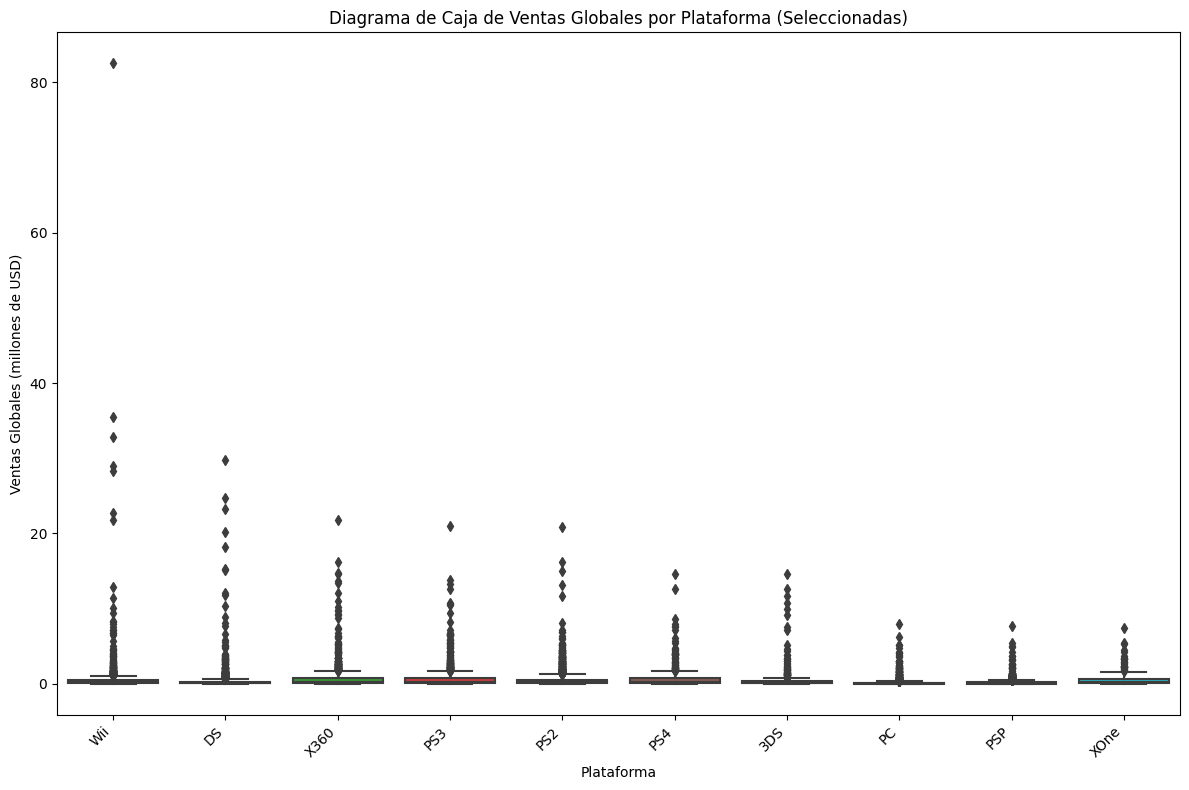

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Plataformas potenciales en ventas y perido
plataformas_seleccionadas = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS4', 'PSP', 'PC', '3DS', 'XOne']

# Filtro de plataformas
data_filtrada = data[data['platform'].isin(plataformas_seleccionadas)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='platform', y='total_sales', data=data_filtrada)
plt.title('Diagrama de Caja de Ventas Globales por Plataforma (Seleccionadas)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (millones de USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!

El diagrama de caja nos muestra como en algunas consolas las ventas estan consolidadas mientras que en otras consolas las ventas son muy disparejas lo que incrementa el rango intercuartil
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />


Recomendaría usar `plt.ylim([0,2])` para limitar los datos en el eje `y` y que de esta manera las cajas se muestren de una mejor manera
</div>


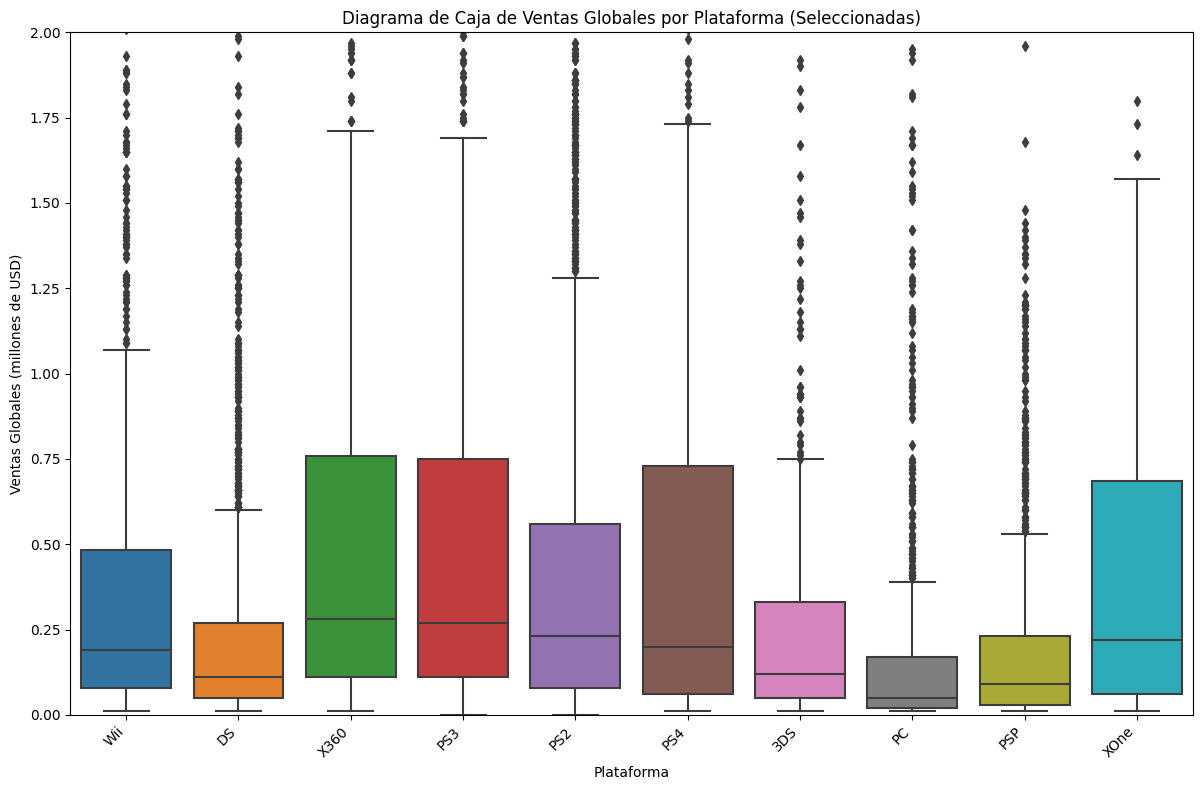

In [27]:

plt.figure(figsize=(12, 8))
sns.boxplot(x='platform', y='total_sales', data=data_filtrada)
plt.title('Diagrama de Caja de Ventas Globales por Plataforma (Seleccionadas)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (millones de USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.ylim([0,2])
plt.show()


#### ¿Son significativas las diferencias en las ventas?

##### Estadística más detallada de cada plataforma

In [28]:
# Plataformas
plataformas_seleccionadas = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS4', 'PSP', 'PC', '3DS', 'XOne']

# Filtro
data_filtrada = data[data['platform'].isin(plataformas_seleccionadas)]

# Plataforma y estadística
estadisticas_por_plataforma = data_filtrada.groupby('platform')['total_sales'].agg(['max', 'min', 'var',
                                                                                     pd.Series.mode, 'mean', 'median',
                                                                                     lambda x: x.quantile(0.25),
                                                                                     lambda x: x.quantile(0.50),
                                                                                     lambda x: x.quantile(0.75)])
# Renombrar las columnas para mayor claridad
estadisticas_por_plataforma.columns = ['Máximo', 'Mínimo', 'Varianza', 'Moda', 'Media', 'Mediana',
                                       'Percentil 25 (Q1)', 'Percentil 50 (Mediana)', 'Percentil 75 (Q3)']

print("Estadísticas Descriptivas de Ventas Totales por Plataforma:")
print("-" * 80)
print(estadisticas_por_plataforma)

Estadísticas Descriptivas de Ventas Totales por Plataforma:
--------------------------------------------------------------------------------
          Máximo  Mínimo  Varianza  Moda     Media  Mediana  \
platform                                                      
3DS        14.60    0.01  2.047406  0.03  0.498077     0.12   
DS         29.80    0.01  2.034764  0.02  0.374765     0.11   
PC          8.01    0.01  0.456404  0.02  0.266448     0.05   
PS2        20.81    0.00  1.294878  0.02  0.581106     0.23   
PS3        21.05    0.00  1.936966  0.02  0.705973     0.27   
PS4        14.63    0.01  2.590350  0.02  0.801378     0.20   
PSP         7.68    0.01  0.270618  0.02  0.243218     0.09   
Wii        82.54    0.01  9.775681  0.02  0.687508     0.19   
X360       21.82    0.01  2.610403  0.02  0.769746     0.28   
XOne        7.39    0.01  1.073584  0.01  0.645020     0.22   

          Percentil 25 (Q1)  Percentil 50 (Mediana)  Percentil 75 (Q3)  
platform                     

1. Rango de ventas (min y max):

- El valor máximo varía mucho entre plataformas. Por ejemplo, en Wii hay un máximo de 82.54 millones, mientras que en PC tenemos un máximo de solo 8.01 millones. 
  - Sugiere que algunos juegos de ciertas plataformas como Wii alcanzaron niveles de éxito comercial muy altos que algunos juegos más vendidos en otras plataformas como PC por ejemplo. <br> <br>
- El valor mínimo es bajo 0.01 o 0 para todas las plataformas (ventas muy bajas o reportadas como cero)


<br> <br>
2. Tendencia central (media y mediana):

- La media de ventas totales denota también gran diferencia.
  - PS4 tiene una media de 0.80 millones, considerablemente mayor que la media de PC de 0.27 millones, o la de PSP de 0.24 millones. Sugiriendo que en promedio los juegos en PS4 venden más a nivel total que PC o PSP.<br> <br>

- La mediana o valor central (Q2 percentil 50) es más bajo que la media en casi todas las plataformas.
  - Indica una distribución sesgada hacia la derecha.
    - Pocos juegos venden mucho y la mayoría venden menos. <br> <br>
  - Pero las medianas también varían entre plataformas, reforzando las diferencias en rendimiento comercial típico. 
    - La mediana de Wii de 0.19 millones es más alta que la de PC de 0.05 millones.

<br> <br>
3. Dispersión (varianza y rango intercuartílico):
- La varianza mide la dispersión de los datos en torno a la media.
  - Plataformas de varianza altas como Wii y PS4 tienen mayor variabilidad en ventas.
    - Mezcla amplia de éxitos masivos y fracasos relativos.
    - Plataformas con varianza baja como PC tienen ventas más consistentes en torno a su media.<br> <br>
    
  - Percentiles (Q1, Mediana, Q3), rango intercuartílico (IQR = Q3 - Q1) o 50% central de las ventas. 
    - Diferencias de valores Q1 y Q3 entre plataformas denotan distintos rangos típicos de ventas.
      - El IQR de PS4 (0.73 - 0.06 = 0.67) es mayor que el de PC (0.17 - 0.02 = 0.15), es decirm, existe mayor dispersión en las ventas típicas de PS4.


<br> <br>
4. Moda:
- La moda (valor más frecuente), es relativamenmte baja, entre 0.02 o 0.03 para la mayoría de plataformas.
  - La mayoría de juegos venden cantidades un tanto pequeñas y los grandes éxitos son atípicos. -Pero la consistencia de la moda no es contraria a las diferencias sobre los extremos superior e inferior de las ventas.

<br> <br>
Conclusión:

Existen diferencias entre máximo, media, mediana y dispersión (varianza y percentiles) de ventas totales entre las plataformas. Significa que el rendimiento comercial típico y el logro potencial de éxito es variable entre plataformas. La plataforma Wii y PS4 muestran mayor potencial de ventas y muy altas, caracterizadas por valores máximos y dispersión; mientras que por su parte, una plataforma como PC se inclina a ventas más bajas en promedio y con menor variabilidad. Si nos fundamentamos en las estadísticas descriptivas, es clara la diferencia entre las ventas.

#### ¿Qué sucede con las ventas promedio en varias plataformas?

In [29]:
# Plataformas
data_filtrada = data[data['platform'].isin(plataformas_seleccionadas)]

print(f"{'Plataforma':<10} {'NA_Sales':<10} {'EU_Sales':<10} {'JP_Sales':<10} {'Other_Sales':<10}")
print("-" * 60)

for plataforma in plataformas_seleccionadas:
    promedios = data_filtrada[data_filtrada['platform'] == plataforma][['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].mean()
    print(f"{plataforma:<10} {promedios['na_sales']:<10.2f} {promedios['eu_sales']:<10.2f} {promedios['jp_sales']:<10.2f} {promedios['other_sales']:<10.2f}")

Plataforma NA_Sales   EU_Sales   JP_Sales   Other_Sales
------------------------------------------------------------
PS2        0.27       0.16       0.06       0.09      
X360       0.48       0.21       0.01       0.07      
PS3        0.30       0.25       0.06       0.10      
Wii        0.38       0.20       0.05       0.06      
DS         0.18       0.09       0.08       0.03      
PS4        0.28       0.36       0.04       0.12      
PSP        0.09       0.06       0.06       0.03      
PC         0.10       0.15       0.00       0.02      
3DS        0.16       0.12       0.19       0.03      
XOne       0.38       0.21       0.00       0.06      


#### Hallazgos

**Tendencias por región:**

- Norteamérica (na_sales):
  - Promedios de ventas más altos:
    - PS2
    - X360
    - PS3
    - Wii
    - PS4. 

El mercado norteamericano contribuye mucho a las ventas promedio de estas consolas.<br><br>


- Europa (eu_sales): Posee promedios de ventas sólidos y cercanos a los de Norteamérica, lo cual le hace un mercado fuerte.<br><br>

- Japón (jp_sales): Promedios de ventas más bajos en comparación con Norteamérica y Europa con relación a las consolas occidentales mencionadas nateriormente (PS2, X360, PS3, Wii, PS4, XOne). Pero plataformas como DS y 3DS denotan unos promedios de ventas considerablemente altos en Japón.
   - Esto indica una preferencia del mercado japonés por consolas portátiles de Nintendo. <br><br>

- Otras Regiones (other_Sales): Son los promedios de ventas más bajos pero no dejan de contribuir a las ventas totales.<br><br>



**Comportamiento por plataforma:**

- Grandes consolas de sobremesa (PS2, X360, PS3, Wii, PS4, XOne): Estas plataformas muestran una fuerte dependencia de los mercados de Norteamérica y Europa para sus ventas promedio más altas. Japón tiene una contribución menor en comparación.

- Consolas Portátiles de Nintendo (DS, 3DS): Si bien también tienen ventas significativas en Norteamérica y Europa, su rendimiento promedio en Japón es relativamente más fuerte en comparación con las consolas de sobremesa occidentales. Esto subraya la importancia del mercado japonés para las plataformas portátiles de Nintendo.

- PSP: Patrón similar a consolas de sobremesa (promedios más altos en Norteamérica y Europa que en Japón).

- PC: Promedios de ventas bajos en todas las regiones (forma de rastreo de ventas por descarga digital - no completo).<br><br>


**Resumen:**

Las ventas promedio varían entre plataformas y regiones. Consolas de sobremesa occidentales con mayores promedios de ventas en Norteamérica y Europa, mientras que consolas portátiles de Nintendo con más rendimiento en Japón. PC con promedios de ventas modestos en todas las regiones. Las diferencias reflejan preferencias regionales de consumidores y popularidad de las plataformas en el mercado.

### Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular 
- Crea un gráfico de dispersión (correlación entre las reseñas y las ventas)

#### Gráfico de dispersión (correlación entre las reseñas y las ventas de PS3)

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

ps3_data = data[data['platform'] == 'PS3'].dropna(subset=['total_sales', 'user_score', 'critic_score'])

# User_score a la misma escala de critic_score (* 10)
ps3_data['user_score_scaled'] = ps3_data['user_score'] * 10

print(f"Número de filas en ps3_data después de filtrar y eliminar NaN: {len(ps3_data)}")
print("-" * 80)
print(f"Valores únicos en total_sales: {ps3_data['total_sales'].nunique()}")
print("-" * 80)
print(f"Valores únicos en user_score_scaled: {ps3_data['user_score_scaled'].nunique()}")
print("-" * 80)
print(f"Valores únicos en critic_score: {ps3_data['critic_score'].nunique()}")

Número de filas en ps3_data después de filtrar y eliminar NaN: 790
--------------------------------------------------------------------------------
Valores únicos en total_sales: 339
--------------------------------------------------------------------------------
Valores únicos en user_score_scaled: 70
--------------------------------------------------------------------------------
Valores únicos en critic_score: 70


In [31]:
if len(ps3_data) > 1:
    
    # Verificar dtype
    print(f"user_score_scaled: {ps3_data['user_score_scaled'].dtype}")
    print(f"total_sales: {ps3_data['total_sales'].dtype}")
    print(f"critic_score: {ps3_data['critic_score'].dtype}")
    print("-" * 80)
    
    # DF´s temporales para correlación
    temp_user_sales = ps3_data[['user_score_scaled', 'total_sales']].dropna()
    temp_critic_sales = ps3_data[['critic_score', 'total_sales']].dropna().copy() # Usar .copy() para evitar SettingWithCopyWarning

    # Convertir critic_score a float64
    temp_critic_sales['critic_score'] = temp_critic_sales['critic_score'].astype('float64')
    
    print(f"Número de filas para correlación user_sales: {len(temp_user_sales)}")
    print(f"Número de filas para correlación critic_sales: {len(temp_critic_sales)}")
    print("-" * 80)
    
    print(f"Valores únicos en temp_user_sales['user_score_scaled']: {temp_user_sales['user_score_scaled'].nunique()}")
    print(f"Valores únicos en temp_user_sales['total_sales']: {temp_user_sales['total_sales'].nunique()}")
    print(f"Valores únicos en temp_critic_sales['critic_score']: {temp_critic_sales['critic_score'].nunique()}")
    print(f"Valores únicos en temp_critic_sales['total_sales']: {temp_critic_sales['total_sales'].nunique()}")
    print("-" * 80)
    
    if len(temp_user_sales) > 1 and temp_user_sales['user_score_scaled'].nunique() > 1 and temp_user_sales['total_sales'].nunique() > 1:
        correlation_user_sales = temp_user_sales['user_score_scaled'].corr(temp_user_sales['total_sales'])
        print(f"Correlación entre Reseña de Usuarios y Ventas Totales (PS3): {correlation_user_sales:.2f}")
    else:
        print("Advertencia: No hay suficientes datos únicos para calcular la correlación entre reseña de usuarios y ventas totales.")
    print("-" * 80)
  
    if len(temp_critic_sales) > 1 and temp_critic_sales['critic_score'].nunique() > 1 and temp_critic_sales['total_sales'].nunique() > 1:
        correlation_critic_sales = temp_critic_sales['critic_score'].corr(temp_critic_sales['total_sales'])
        print(f"Correlación entre Reseña de Críticos y Ventas Totales (PS3): {correlation_critic_sales:.2f}")
    else:
        print("Advertencia: No hay suficientes datos únicos para calcular la correlación entre reseña de críticos y ventas totales.")

else:
    print("No hay suficientes datos iniciales para la PS3.")

user_score_scaled: float64
total_sales: float64
critic_score: Int64
--------------------------------------------------------------------------------
Número de filas para correlación user_sales: 790
Número de filas para correlación critic_sales: 790
--------------------------------------------------------------------------------
Valores únicos en temp_user_sales['user_score_scaled']: 70
Valores únicos en temp_user_sales['total_sales']: 339
Valores únicos en temp_critic_sales['critic_score']: 70
Valores únicos en temp_critic_sales['total_sales']: 339
--------------------------------------------------------------------------------
Correlación entre Reseña de Usuarios y Ventas Totales (PS3): 0.14
--------------------------------------------------------------------------------
Correlación entre Reseña de Críticos y Ventas Totales (PS3): 0.43


##### Ventas Totales vs. Reseña de Usuarios (PS3)

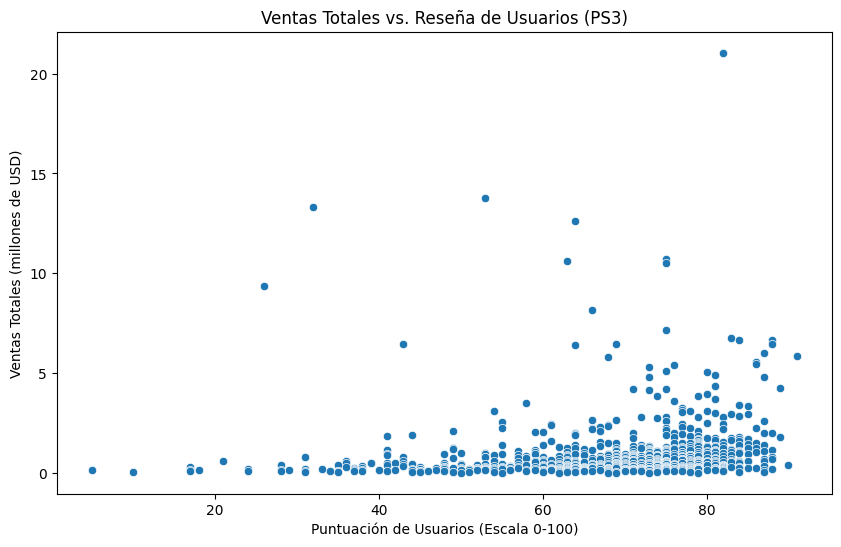

In [33]:
if len(ps3_data) > 1:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='user_score_scaled', y='total_sales', data=ps3_data)
    plt.title('Ventas Totales vs. Reseña de Usuarios (PS3)')
    plt.xlabel('Puntuación de Usuarios (Escala 0-100)')
    plt.ylabel('Ventas Totales (millones de USD)')
    #plt.grid(True)
    plt.show()
else:
    print("No hay suficientes datos para generar el gráfico de dispersión de Ventas vs. Reseña de Usuarios para la PS3 con las columnas seleccionadas.")

📊  Correlación entre Reseña de Usuarios y Ventas Totales (PS3): 0.14
- Un coeficiente de correlación de 0.14:
  - Correlación positiva muy débil tomando en cuenta la puntuación de usuarios escalada de 0 a 100 y las ventas totales de los juegos de PlayStation 3.
  
- Significancias: 
  - Tendencia muy leve: Muy débil tendencia de que los juegos con alta puntuación vendan un poco más.
  - Mucha dispersión: Gran cantidad de dispersión.
    - Juegos con puntuaciones de usuario similar tienen ventas muy distintas 
    - Juegos con ventas similares pueden tener puntuaciones de usuario muy variadas.
    
Las ventas totales deben estar impulsadas por factores como el género de juego, popularidad de la franquicia, campaña de marketing, precio, disponibilidad, publicidad oral y reseñas de críticos como se observa en la siguiente correlación.

La opinión promedio de usuarios individualmente no es un decisor fuerte sobre el éxito comercial de un juego de PS3.

La reseña promedio de usuarios tiene un impacto muy pequeño y poco confiable sobre las ventas totales de juegos PS3. 

##### Ventas Totales vs. Reseña de Críticos (PS3)

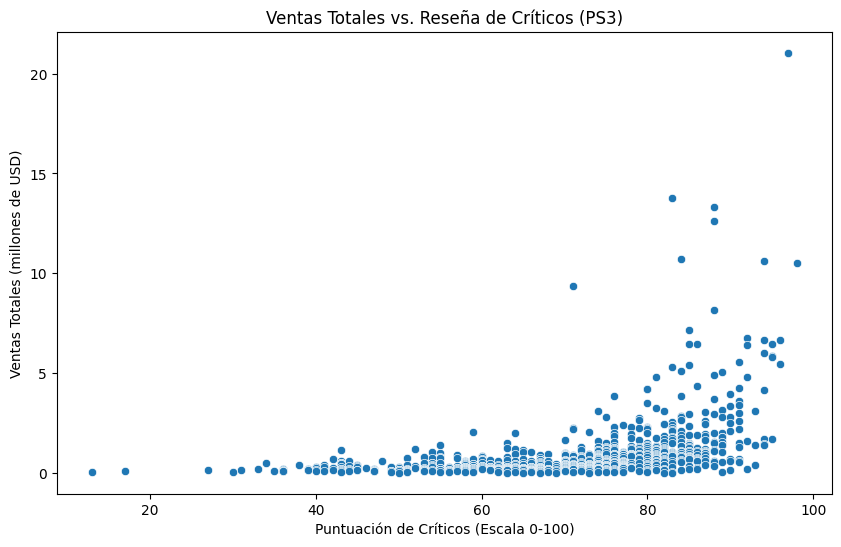

In [35]:
if len(ps3_data) > 1:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='critic_score', y='total_sales', data=ps3_data)
    plt.title('Ventas Totales vs. Reseña de Críticos (PS3)')
    plt.xlabel('Puntuación de Críticos (Escala 0-100)')
    plt.ylabel('Ventas Totales (millones de USD)')
    #plt.grid(True)
    plt.show()
else:
    print("No hay suficientes datos para generar el gráfico de dispersión de Ventas vs. Reseña de Críticos para la PS3 con las columnas seleccionadas.")

📊 Correlación entre Reseña de Críticos y Ventas Totales (PS3): 0.43

- Coeficiente de correlación de 0.43, positivo y moderada entre la puntuación de críticos, escala de 0 a 100 y las ventas totales de juegos P3.
  - Tendencia más clara que la correlación anterior. Aún hay dispersión pero es más notable que los juegos reciban puntuaciones más altas de los críticos y tiendan a vender más unidades. una relación más fuerte que con las puntuaciones de usuarios.
    - Aún hay cierta dispersión:
      - Juegos con puntuaciones de críticos similar pueden tener rangos de ventas
      - Juegos con puntuaciones de críticos más bajas pueden alcanzar ventas significativas (menos común en extremo superior)
      
- La opinión de los críticos parece tener influencia más fuerte en el éxito comercial de los juegos de PS3 con respecto a la opinión los usuarios. Talvez porque las reseñas de críticos influyen en:
  - Percepción inicial del juego
  - Cobertura mediática
  - Decisiones de compra de algunos consumidores, particularmente en el lanzamiento.
  
Aunque tiene una correlación moderada, existen otros factores como el marketing, franquicia, género y disponibilidad; como aspectos importantes en las ventas totales. El buen puntaje de crítica aumenta la probabilidad de mayores ventas, pero no lo asegura por completo.

La crítica muestra correlación positiva moderada con las ventas de PS3, es una influencia mucho más significativa en el éxito comercial, que la opinión de los usuarios.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!

Las observaciones que haces respecto a la relación entre las reseñas y las ventas me parecen acertadas
</div>


#### Conclusiones:

- Ventas varían mucho por plataforma:
  - Algunas como Wii, DS con más éxitos masivos. 
  - Preferencias regionale es clave, Norteamérica y Europa fuertes en consolas de sobremesa occidentales y Japón en portátiles de Nintendo.

- PS3 y reseñas de críticos tuienen correlación positiva moderada de 0.43, sobre las ventas totales y es más fuerte que la correlación positiva muy débil de los usuarios con 0.14.

El éxito depende de múltiples factores como:
- Calidad
- Marca
- Marketing
- Precio
- Plataforma
- Región
- Reseñas

La opinión crítica tiene mayor peso sobre las ventas que la de los usuarios para PS3. Cualquier estrategias deben considerar además las preferencias regionales.

### Comparar ventas de los mismos juegos en otras plataformas
- Con base a las conclusiones anteriores 

#### Instalar "r" para expresiones irregulares y limpiar generando DF clean_named

In [36]:
import re #re para expresiones regulares (para limpiar los nombres de los juegos).
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
data['name_cleaned'] = data['name'].astype(str).apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

In [38]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   Int64         
 9   user_score       7590 non-null   float64       
 10  rating           9949 non-null   object        
 11  total_sales      16715 non-null  float64       
 12  name_cleaned     16715 non-null  object        
dtypes: Int64(1), datetime64[ns](1), float64(6), object(5)
memory usage: 1.7+ MB
None


#### Agrupar y contar por nombre ya limpio

In [ ]:
plataformas_interes = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS4', 'PSP', 'PC', '3DS', 'XOne']

# Filtro año y plataforma
data_filtrado = data[(data['year_of_release'].dt.year >= 2007) & (data['year_of_release'].dt.year <= 2016) & (data['platform'].isin(plataformas_interes))]

# Agrupar y contar
platform_counts_filtrado = data_filtrado.groupby('name_cleaned')['platform'].nunique()

print("Número de plataformas por juego (primeros 20, filtrado):\n")
print(platform_counts_filtrado.head(20).to_markdown(numalign="left", stralign="left"))

In [34]:
# Filto multiplataforma
multiplatform_games_filtrado = platform_counts_filtrado[platform_counts_filtrado > 1]

print(f"\nNúmero de juegos multiplataforma (filtrado): {len(multiplatform_games_filtrado)}")


Número de juegos multiplataforma (filtrado): 1551


⭐ El total de juegos multiplataforma o que están presentes en más de una plataforma asciende a: **1551**

⭐ Recordar que estamos dentro del rango elegido de 2007 a 2016, porque si fuese el total de años del dataframe serían **2815**

#### Histograma para visualizar cuántos juegos aparecen en 2, 3, 4 o más plataformas.

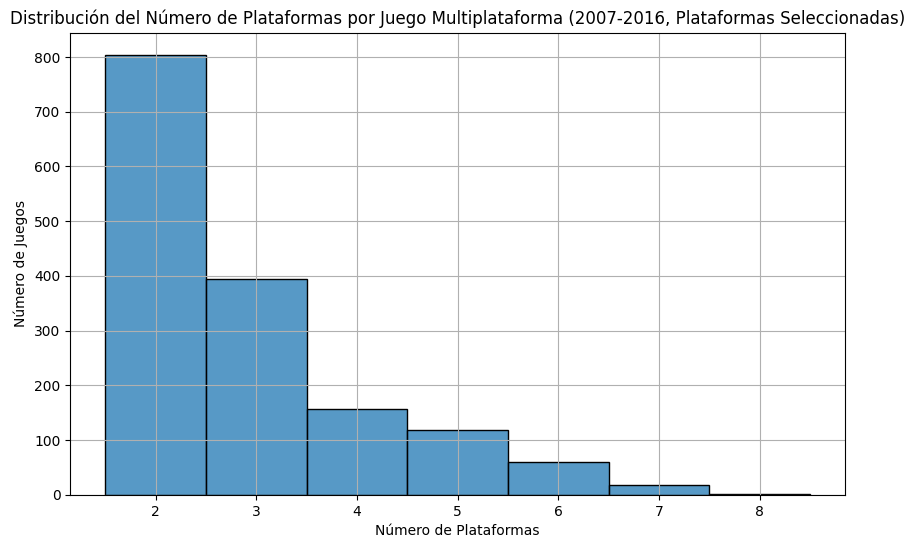

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(multiplatform_games_filtrado, bins=range(2, multiplatform_games_filtrado.max() + 2), discrete=True)
plt.title('Distribución del Número de Plataformas por Juego Multiplataforma (2007-2016, Plataformas Seleccionadas)')
plt.xlabel('Número de Plataformas')
plt.ylabel('Número de Juegos')
plt.grid(True)
plt.show()

#### Prueba comparativa de ventas del Grand Theft Auto V en distintas plataformas

In [36]:
# Juego de prueba 'Grand Theft Auto V'
juego_seleccionado_filtrado = 'Grand Theft Auto V'

# Filtro
ventas_juego_seleccionado_filtrado = data_filtrado[data_filtrado['name_cleaned'] == juego_seleccionado_filtrado]

print(f"\nVentas de '{juego_seleccionado_filtrado}' por plataforma (2007-2016, Plataformas Seleccionadas):\n")
print(ventas_juego_seleccionado_filtrado[['platform', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].to_markdown(index=False, numalign="left", stralign="left"))


Ventas de 'Grand Theft Auto V' por plataforma (2007-2016, Plataformas Seleccionadas):

| platform   | na_sales   | eu_sales   | jp_sales   | other_sales   | total_sales   |
|:-----------|:-----------|:-----------|:-----------|:--------------|:--------------|
| PS3        | 7.02       | 9.09       | 0.98       | 3.96          | 21.05         |
| X360       | 9.66       | 5.14       | 0.06       | 1.41          | 16.27         |
| PS4        | 3.96       | 6.31       | 0.38       | 1.97          | 12.62         |
| XOne       | 2.81       | 2.19       | 0          | 0.47          | 5.47          |
| PC         | 0.39       | 0.69       | 0          | 0.09          | 1.17          |


#### Comparar ventas de juegos multiplataforma

In [37]:
def comparar_ventas_juego_filtrado(df, nombre_juego):
    ventas = df[df['name_cleaned'] == nombre_juego]
    if not ventas.empty:
        print(f"\nVentas de '{nombre_juego}' por plataforma (2007-2016, Plataformas Seleccionadas):\n")
        print(ventas[['platform', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].to_markdown(index=False, numalign="left", stralign="left"))
    else:
        print(f"\nNo se encontraron datos para '{nombre_juego}'.")

# Lista multiplataforma
juegos_a_comparar_filtrado = ['FIFA 15', 'Minecraft', 'Call of Duty Black Ops']

# Iterar
for juego in juegos_a_comparar_filtrado:
    comparar_ventas_juego_filtrado(data_filtrado, juego)


Ventas de 'FIFA 15' por plataforma (2007-2016, Plataformas Seleccionadas):

| platform   | na_sales   | eu_sales   | jp_sales   | other_sales   | total_sales   |
|:-----------|:-----------|:-----------|:-----------|:--------------|:--------------|
| PS4        | 0.8        | 4.33       | 0.05       | 0.9           | 6.08          |
| PS3        | 0.58       | 3.02       | 0.04       | 0.64          | 4.28          |
| X360       | 0.79       | 1.92       | 0          | 0.21          | 2.92          |
| XOne       | 0.6        | 1.42       | 0          | 0.16          | 2.18          |
| Wii        | 0.15       | 0.37       | 0          | 0.04          | 0.56          |
| 3DS        | 0.09       | 0.34       | 0          | 0.03          | 0.46          |
| PC         | 0          | 0.27       | 0          | 0.02          | 0.29          |

Ventas de 'Minecraft' por plataforma (2007-2016, Plataformas Seleccionadas):

| platform   | na_sales   | eu_sales   | jp_sales   | other_sales   | 

**Conclusiones:**

| Juego                     | Plataforma   | NA_sales   | EU_sales   | JP_sales   | Other_sales   | Total_sales   |
|---------------------------|--------------|------------|------------|------------|---------------|---------------|
| Grand Theft Auto V        | PS3          | 7.02       | 9.09       | 0.98       | 3.96          | 21.05         |
| Grand Theft Auto V        | X360         | 9.66       | 5.14       | 0.06       | 1.41          | 16.27         |
| Grand Theft Auto V        | PS4          | 3.96       | 6.31       | 0.38       | 1.97          | 12.62         |
| Grand Theft Auto V        | XOne         | 2.81       | 2.19       | 0          | 0.47          | 5.47          |
| Grand Theft Auto V        | PC           | 0.39       | 0.69       | 0          | 0.09          | 1.17          |
| FIFA 15                   | PS4          | 0.8        | 4.33       | 0.05       | 0.9           | 6.08          |
| FIFA 15                   | PS3          | 0.58       | 3.02       | 0.04       | 0.64          | 4.28          |
| FIFA 15                   | X360         | 0.79       | 1.92       | 0          | 0.21          | 2.92          |
| FIFA 15                   | XOne         | 0.6        | 1.42       | 0          | 0.16          | 2.18          |
| FIFA 15                   | Wii          | 0.15       | 0.37       | 0          | 0.04          | 0.56          |
| FIFA 15                   | 3DS          | 0.09       | 0.34       | 0          | 0.03          | 0.46          |
| FIFA 15                   | PC           | 0          | 0.27       | 0          | 0.02          | 0.29          |
| Minecraft                 | X360         | 5.7        | 2.65       | 0.02       | 0.81          | 9.18          |
| Minecraft                 | PS3          | 2.03       | 2.37       | 0          | 0.87          | 5.27          |
| Minecraft                 | PS4          | 1.48       | 2.02       | 0.14       | 0.68          | 4.32          |
| Minecraft                 | XOne         | 1.61       | 0.9        | 0          | 0.25          | 2.76          |
| Call of Duty Black Ops   | X360         | 9.7        | 3.68       | 0.11       | 1.13          | 14.62         |
| Call of Duty Black Ops   | PS3          | 5.99       | 4.37       | 0.48       | 1.79          | 12.63         |
| Call of Duty Black Ops   | Wii          | 0.8        | 0.45       | 0          | 0.12          | 1.37          |
| Call of Duty Black Ops   | DS           | 0.5        | 0.04       | 0          | 0.04          | 0.58          |


**1. Grand Theft Auto V (GTA V):**
- Dominio de consolas de sobremesa: GTA V indica preferencia del mercado por  consolas de sobremesa durante el 2007-2016. 
- PS3 y X360 lideran las ventas sugiriendo una fuerte presencia en el mercado para este periodo.
- Transición a nueva generación: Ventas de PS4 y XOne aunque menos que PS3/X360, indican una migración de jugadores a consolas de nueva generación como PS4 y XOne gradualmente.
- PC - nicho: Versión PC con las ventas más bajas para este período, mientras que GTA V era un juego de consola.<br><br>

**2. FIFA 15:**

- Fuerte PlayStation: PS4 y PS3 con ventaja en ventas de FIFA 15. Talvez una base de fans más grande de FIFA en consolas PlayStation o gracias a mejores estrategias de marketing.
- Xbox: Xbox con X360 y XOne detrás de las ventas de PlayStation.
- Portátiles y Wii menores: Ventas en Wii y 3DS mucho menores, indicando que los juegos deportivos pudiesen no ser tan impactantes en estas plataformas o, las versiones son diferentes en contenido y calidad.
- PC rezagado: Versión de PC con las ventas más bajas recalcando que FIFA es principalmente un juego de consola.

**3. Minecraft:**

- Éxito con Xbox 360: Xbox 360 lidera las ventas de Minecraft, curioso pues Minecraft tuvo éxito generalizado en muchas plataformas.
- PlayStation fuerte: PS3 y PS4 con ventas significativas, popular en ambas marcas de consolas.
- Ausencia de PC: PC ausente debido al modo de registro de ventas o que la versión se vendió comercializó mediante canales digitales no contabilizados.

**4. Call of Duty: Black Ops:**

- Dominio de consolas de sobremesa: Como con GTA, Call of Duty: Black Ops, tiene un fuerte impacto en consolas de sobremesa (Xbox 360 y PS3).
- Xbox un poco adelante: Xbox 360 con ligera ventaja sobre PS3, indicando una base de fans más grande de Call of Duty en la plataforma Xbox pa este perido.
- Wii y DS menores: Ventas en Wii y DS un tanto menores, la experiencia de juego talvez fue diferente en estas plataformas o no tan atractiva para los jugadores de Call of Duty.

**Inferencia General:**

-Consolas de sobremesa lideran: Entre 2007 y 2016 las consolas PS3, Xbox 360, PS4, Xbox One fueron las plataformas dominantes para juegos AAA como GTA, FIFA y Call of Duty.

- PlayStation y Xbox como Competidores: PlayStation y Xbox como principales competidores en el mercado de consolas.

- PC como plataforma nicho (en casos aislados): PC a menudo representando un mercado pequeño en comparación a las otras consolas.

- Portátiles y Wii como mercados distintos: Consolas como DS y PSP; y la Wii comúnmente en un mercado diferente, con distintos tipos de juego o niveles de éxito en juegos AAA.

- Transición de deneración: Hay una transición de la 7ma generación en PS3, Xbox 360, Wii a la 8va generación PS4, Xbox One dentro del período analizado.

-Limitaciones: Estamos analizando sólo ventas físicas pero obviando las ventas digitales, muy populares durante este período y que no están incluidas. Por lo tanto, los datos pudiesen no ser muy precisos o completos y las tendencias pudiesen variar en distintas regiones.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!

Muy buena manera de presentar el analisis sobre los juegos multiplataforma, odemos ver claramente las variaciones en ventas en las distintas consolas
</div>


### Distribución general de los juegos por género.

#### Cantidad de juegos por género y por plataformas potenciales (2007-2016). 

In [40]:
genre_counts = data_filtrado['genre'].value_counts()
print("Distribución de juegos por género:\n")
print(genre_counts)

Distribución de juegos por género:

Action          1980
Misc            1096
Sports          1088
Adventure        854
Role-Playing     794
Shooter          652
Simulation       544
Racing           473
Strategy         341
Fighting         337
Puzzle           316
Platform         260
Name: genre, dtype: int64


#### Ventas totales por género y por plataformas potenciales (2007-2016).

In [41]:
# Ventas totales por género
genre_sales_filtrado = data_filtrado.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print("\nVentas totales por género (2007-2016, plataformas seleccionadas):\n")
print(genre_sales_filtrado)


Ventas totales por género (2007-2016, plataformas seleccionadas):

genre
Action          1012.19
Shooter          668.89
Sports           650.08
Misc             469.77
Role-Playing     449.99
Racing           254.81
Platform         206.36
Simulation       198.85
Fighting         157.11
Adventure        125.72
Puzzle            77.68
Strategy          67.40
Name: total_sales, dtype: float64


#### Combinación de ambas ordenada por cantidad (cantidad y ventas).

In [42]:
# Combinar
tabla_combinada = pd.DataFrame({
    'Cantidad de Juegos': genre_counts,
    'Ventas Totales': genre_sales_filtrado
})

# Ordenar por ventas totales
tabla_combinada = tabla_combinada.sort_values(by='Ventas Totales', ascending=False)

print(tabla_combinada)

              Cantidad de Juegos  Ventas Totales
Action                      1980         1012.19
Shooter                      652          668.89
Sports                      1088          650.08
Misc                        1096          469.77
Role-Playing                 794          449.99
Racing                       473          254.81
Platform                     260          206.36
Simulation                   544          198.85
Fighting                     337          157.11
Adventure                    854          125.72
Puzzle                       316           77.68
Strategy                     341           67.40


#### Combinación de ambas ordenada por ventas (cantidad y ventas).

**¿Qué se puede decir de los géneros más rentables?**

- Géneros de acción, deportes y armas-disparos, son los de alto volumen de ventas.
- sugiere fuerte atractivo y rentabilidad en el mercado. 
- Pero la rentabilidad pudiese afectarse por costos de producción y elementos clave no capturados dentro de los datos de venta.

**¿Puedes generalizar acerca de los géneros con ventas altas y bajas?**

- Géneros con alta venta suelen correlacionarse con el atractivo, como en caso de deportes o acción.
- Por su parte, las ventas más bajas pudiesen indicar géneros de nicho o títulos de menor penetración en el mercado.
- El éxito pudiese depender de la plataforma ya que el rendimiento de un género podría variar entre distintas consolas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!

Buena manera de presentar los datos, podemos ver claramente cuales son los generos preferidos de las personas, las observaciones que haces me parecen buenas también
</div>


## Crea un perfil de usuario para cada región (NA, UE, JP):

### Las 5 plataformas principales

In [43]:
# Función para obtener las 5 plataformas principales por región
def top_5_plataformas_por_region(data, region_col):
    """
    Obtiene las 5 plataformas principales para una región específica, ordenadas por ventas.

    Args:
        df (pd.DataFrame): DataFrame con los datos de videojuegos.
        region_col (str): Nombre de la columna de la región ('na_sales', 'eu_sales', 'jp_sales').

    Returns:
        pd.Series: Serie con las 5 plataformas principales y sus ventas.
    """

    top_platforms = data.groupby('platform')[region_col].sum().sort_values(ascending=False).head(5)
    return top_platforms

#### Paso 1 -  Las cinco plataformas principales.

In [ ]:
# Paso 1 -  Top 5 platforms.
print("A. Perfiles de usuario por región\n")

# Perfil Norteamérica (NA)
top_na_platforms = top_5_plataformas_por_region(data_filtrado, 'na_sales')
print("  - Norteamérica (NA):\n", top_na_platforms.to_markdown(numalign="left", stralign="left"))

# Perfil Europa (EU)
top_eu_platforms = top_5_plataformas_por_region(data_filtrado, 'eu_sales')
print("\n  - Europa (EU):\n", top_eu_platforms.to_markdown(numalign="left", stralign="left"))

# Perfil Japón (JP)
top_jp_platforms = top_5_plataformas_por_region(data_filtrado, 'jp_sales')
print("\n  - Japón (JP):\n", top_jp_platforms.to_markdown(numalign="left", stralign="left"))

#### Describe las variaciones en sus cuotas de mercado de una región a otra.

**Comparación del éxito:**

1. Identificar plataformas líderes
- Se identifican 5 plataformas principales en cada región (principales actores del mercado por zona).

2. Cálculo de la cuota de mercado regional
- Calcular el porcentaje de ventas totales en cada región para cada una de las 5 plataformas principales (conocer el grado de dominio de una plataforma en una región en concreto).

3. Comparación de las cuotas de mercado entre regiones
- Comparar porcentajes de cuota de mercado para cada plataforma entre NA, EU y JP (conocer donde la plataforma es fuerte o débil).

4. Elementos descriptivos clave
- Identificar plataformas con fuerte dominio en una región particular (cuota significativamente mayor que otra en la región).
- Consistencia: Se mantienen con una cuota de mercado consistente en todas las regiones.
- Preferencias regionales: Fuertes preferencias regionales (plataforma muy popular en una región o menos en otra).
- Cambios en el poder: Cambios de una región a otra (plataforma es la No.1 en NA pero No.3 en EU).
- Mercados nicho: Si tiene mercado nicho en alguna región específica.

**Norteamérica (NA):**
- X360 domina el mercado con participación del 31,94%
- Le sigue Wii con 24,00% y PS3 con 21,99%. 
- La DS alcanza un 15,80%.
- Mientras que PS4 tiene una presencia más modesta del 6,27%. 

El mercado NA muestra clara preferencia por consolas de sobremesa como la X360 y Wii. <br><br>

**Europa (EU):**
- Lidera PS3 con el 30,39% de la cuota de mercado
- Les igue de cerca X360 con 24,42%. 
- Wii mantiene una sólida posición con 20,40%.
- PS4 y DS tienen cuotas más pequeñas, de 13,46% y 11,39% respectivamente

Es un mercado más repartido en comparación a Norteamérica.<br><br>

**Japón (JP):**
- Dominio de las consolas portátiles. 
- DS lidera con un 25,27%
- Le sigue de cerca 3DS con el 24,71%.
- PS3 alcanza el 19,23%
- Mientras que PSP y Wii tienen cuotas de 16,28% y 14,52% respectivamente. 

A diferencia de NA y EU, los dispositivos portátiles tienen una fuerte preferencia entre los consumidores.<br><br>

**Conclusiones clave:**

- Dominio regional

| Región         | Plataforma líder | Cuota de mercado (%) |
|:---------------|:-----------------|:---------------------|
| Norteamérica   | X360              | 31,94%               |
| Europa         | PS3               | 30,39%               |
| Japón          | DS                | 25,27%               |

<p align="center"><b>Conclusión:</b> El dominio regional muestra que la X360 lidera Norteamérica, la PS3 lidera Europa y la DS lidera Japón, reflejando distintas preferencias de mercado en cada región.</p>

---

- Consistencia entre regiones

| Plataforma | Norteamérica | Europa | Japón  |
|:-----------|:-------------|:-------|:-------|
| PS3        | 21,99%        | 30,39% | 19,23% |
| Wii        | 24,00%        | 20,40% | 14,52% |
| DS         | 15,80%        | 11,39% | 25,27% |

<p align="center"><b>Conclusión:</b> La PS3, Wii y DS muestran una fuerte consistencia, manteniendo cuotas relevantes en las tres regiones analizadas.</p>

---

- Preferencias regionales

| Plataforma | Observación |
|:-----------|:------------|
| DS         | Mucho más popular en Japón (25,27%) que en Europa (11,39%) |
| 3DS        | Alta participación solo en Japón (24,71%) |
| PSP        | Relevante en Japón (16,28%), casi nula en NA y EU |

<p align="center"><b>Conclusión:</b> Las plataformas como DS, 3DS y PSP evidencian fuertes preferencias regionales, especialmente hacia las consolas portátiles en Japón.</p>

---

- Mercados de nicho

| Plataforma | Región donde destaca | Cuota (%) |
|:-----------|:----------------------|:---------:|
| PSP        | Japón                  | 16,28%    |
| 3DS        | Japón                  | 24,71%    |

<p align="center"><b>Conclusión:</b> Algunas plataformas como PSP y 3DS tienen éxito mayormente en mercados de nicho, particularmente en Japón.</p>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!

Esta grafica nos cuenta cosas muy interesantes, Europa y Norteamerica con comportamientos algo similares mientras que Japón con una tendencia diferente en las ventas
</div>


### Los 5 géneros principales.

In [43]:
genre_sales_na = data_filtrado.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
top_genres_na = genre_sales_na.head(10)

genre_sales_eu = data_filtrado.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
top_genres_eu = genre_sales_eu.head(10)

genre_sales_jp = data_filtrado.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
top_genres_jp = genre_sales_jp.head(10)

print(genre_sales_na)
print()
print(genre_sales_eu)
print()
print(genre_sales_jp)

genre
Action          477.08
Shooter         346.29
Sports          320.73
Misc            252.09
Role-Playing    172.22
Racing          108.43
Platform        100.43
Simulation       97.04
Fighting         77.54
Adventure        55.59
Puzzle           37.43
Strategy         25.90
Name: na_sales, dtype: float64

genre
Action          323.97
Shooter         226.92
Sports          209.00
Misc            122.64
Racing          100.99
Role-Playing    100.62
Simulation       63.58
Platform         62.21
Fighting         36.11
Adventure        34.60
Puzzle           25.27
Strategy         22.88
Name: eu_sales, dtype: float64

genre
Role-Playing    141.88
Action           88.36
Misc             44.03
Sports           38.71
Adventure        24.54
Fighting         24.10
Platform         22.25
Simulation       20.86
Shooter          15.66
Strategy         12.64
Racing           10.87
Puzzle            8.76
Name: jp_sales, dtype: float64


In [44]:
# Perfil de usuario para NA Sales
perfil_na_df = pd.DataFrame({
    'Género': top_genres_na.index,
    'Ventas Totales (NA)': top_genres_na.values
})

# Perfil de EU Sales
perfil_eu_df = pd.DataFrame({
    'Género': top_genres_eu.index,
    'Ventas Totales (EU)': top_genres_eu.values
})

# Perfil de JP Sales
perfil_jp_df = pd.DataFrame({
    'Género': top_genres_jp.index,
    'Ventas Totales (JP)': top_genres_jp.values
})

# Imprimir las tablas de cada perfil
print("Perfil de usuario - NA Sales:")
print(perfil_na_df)
print("\nPerfil de usuario - EU Sales:")
print(perfil_eu_df)
print("\nPerfil de usuario - JP Sales:")
print(perfil_jp_df)

Perfil de usuario - NA Sales:
         Género  Ventas Totales (NA)
0        Action               477.08
1       Shooter               346.29
2        Sports               320.73
3          Misc               252.09
4  Role-Playing               172.22
5        Racing               108.43
6      Platform               100.43
7    Simulation                97.04
8      Fighting                77.54
9     Adventure                55.59

Perfil de usuario - EU Sales:
         Género  Ventas Totales (EU)
0        Action               323.97
1       Shooter               226.92
2        Sports               209.00
3          Misc               122.64
4        Racing               100.99
5  Role-Playing               100.62
6    Simulation                63.58
7      Platform                62.21
8      Fighting                36.11
9     Adventure                34.60

Perfil de usuario - JP Sales:
         Género  Ventas Totales (JP)
0  Role-Playing               141.88
1        Action     

#### Diferencia entre los géneros

Diferencias principales por región:
- NA (América del Norte): Action - Shooter - Sports - Misc


- EU (Europa): Action - Shooter - Sports - Misc
Mayor presencia de géneros como Racing y Role-Playing.
El tipo RPG es significativos (Rol), interés por la narrativa y personalización de personajes.

- JP (Japón): Role-Playing - Action - Misc - Sports     
  - Destaca en Role-Playing (RPG) tradicional en la región como las grandes franquicias de Final Fantasy y Dragon Quest.
  - También acción y aventura aunque los más comerciales de disparos y deportes tienen menor relevancia.

Resumen de la diferencia:
- NA: Acción rápida, disparos y deportes.

- EU: Mezcla de acción, disparos, deportes y enfoque en carreras y RPGs.

- JP: Énfasis en RPG, mezcla de aventura, acción y otros géneros como simulación.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!

Una vez más el mercado japones marcando una tendencia única
</div>


### Afectación de las clasificaciones de ESRB sobre las ventas en regiones individuales.


**La clasificación ESRB sí afecta las ventas en diferentes regiones de la siguientes manera:**

- Norteamérica (NA): Los clasificados como M (Mature) y T (Teen) dominan las ventas. El público adulto es un mercado importante y los títulos para audiencias maduras tienen altas cifras de ventas.

- Europa (EU): Igual que Norteamérica los clasificados como T (Teen) y M (Mature) tienen buenas ventas. Pero Europa muestra mayor aceptación hacia juegos E (Everyone) en comparación con NA seguramente por preferencias culturales más amplias dentro del mercado familiar.

- Japón (JP): Presenta un patrón diferente ya que los juegos clasificados como E (Everyone) y T (Teen) lideran las ventas. Se alinea con la fuerte preferencia japonesa por títulos portátiles, familiares y de géneros accesibles, como los de oaventuras y RPGs.


**Conclusión:**
La clasificación ESRB si influye de forma importante sobre las ventas, pero en cada región varía:
- En NA y EU: Juegos para adolescentes y adultos (T y M) dominan.
- En JP: Juegos más accesibles a todas las edades (E) tienen mayor recepción.

Las estrategias de marketing deben considerar no solo la calidad del juego y su reseña crítica, sino también el "rating" ESRB y preferencias culturales de cada mercado.

Resumen rating ESRB	- Región donde es más fuerte
- M (Mature)	Norteamérica
- T (Teen)    	Europa
- E (Everyone)	Japón

## Prueba las siguientes hipótesis

### Formulación de las hipótesis

#### **Hipótesis 1 (Plataformas XOne vs PC):**

- Hipótesis Nula (H₀): No existe diferencia significativa entre las calificaciones promedio de los usuarios para las plataformas Xbox One y PC. Matemáticamente: μ XOne=μPC.<br><br>

- Hipótesis Alternativa (H₁): Existe una diferencia significativa entre las calificaciones promedio de los usuarios para las plataformas Xbox One y PC. Matemáticamente: μXOne=μPC. Esta es una prueba de dos colas porque la hipótesis original solo pregunta si son "las mismas", no si una es específicamente mayor o menor que la otra.

In [51]:
xbox_one_scores = data_filtrado[(data_filtrado['platform'] == 'XOne') & (data_filtrado['user_score'].notna())]['user_score']
pc_scores = data_filtrado[(data_filtrado['platform'] == 'PC') & (data_filtrado['user_score'].notna())]['user_score']

In [52]:
# Nivel de significancia (alfa)
alpha = 0.05#### Cómo formulaste las hipótesis nula y alternativa.

#### Levene

In [53]:
from scipy import stats  # Import the stats module from scipy

# H0: Las varianzas son iguales
# H1: Las varianzas son diferentes
levene_stat_plat, levene_p_plat = stats.levene(xbox_one_scores, pc_scores)
print(f'--- Hipótesis 1: XOne vs PC ---')
print(f'Prueba de Levene para varianzas: Estadístico={levene_stat_plat:.3f}, p-valor={levene_p_plat:.3f}')

equal_variances_plat = levene_p_plat > alpha
if equal_variances_plat:
    print("No se rechaza H0 de Levene: Se asumen varianzas iguales.")
else:
    print("Se rechaza H0 de Levene: Se asumen varianzas diferentes.")


--- Hipótesis 1: XOne vs PC ---
Prueba de Levene para varianzas: Estadístico=2.411, p-valor=0.121
No se rechaza H0 de Levene: Se asumen varianzas iguales.


#### " t" Student

In [55]:
from scipy import stats

# H0: media(XOne) = media(PC)
# H1: media(XOne) != media(PC)
results_plat = stats.ttest_ind(xbox_one_scores, pc_scores, equal_var=equal_variances_plat, nan_policy='omit')

print(f'Valor p: {results_plat.pvalue:.3f}')

if results_plat.pvalue < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: No hay evidencia suficiente para decir que las calificaciones promedio son diferentes.")

print(f'Calificación promedio XOne: {xbox_one_scores.mean():.2f}')
print(f'Calificación promedio PC: {pc_scores.mean():.2f}')
print("-" * 30)


Valor p: 0.056
No podemos rechazar la hipótesis nula: No hay evidencia suficiente para decir que las calificaciones promedio son diferentes.
Calificación promedio XOne: 6.52
Calificación promedio PC: 6.77
------------------------------


### Hipótesis 2 (Géneros Acción vs Deportes)

- Hipótesis Nula (H₀): No existe diferencia significativa entre las calificaciones promedio de los usuarios para los géneros Acción y Deportes. Matemáticamente: μAcción=μDeportes.<br><br>
- Hipótesis Alternativa (H₁): Existe una diferencia significativa entre las calificaciones promedio de los usuarios para los géneros Acción y Deportes. Matemáticamente: μAcción=μDeportes. Esta también es una prueba de dos colas porque la hipótesis original afirma que son "diferentes", sin especificar la dirección de la diferencia.


In [48]:
# Preparar filtrar por género y eliminar NaNs en user_score
action_scores = data_filtrado[(data_filtrado['genre'] == 'Action') & (data_filtrado['user_score'].notna())]['user_score']
sports_scores = data_filtrado[(data_filtrado['genre'] == 'Sports') & (data_filtrado['user_score'].notna())]['user_score']

#### Levene

In [56]:
from scipy import stats as st  # Import scipy.stats as st

# Filtrar las puntuaciones de usuario para los géneros Acción y Deportes
action_scores = data_filtrado[(data_filtrado['genre'] == 'Action') & (data_filtrado['user_score'].notna())]['user_score']
sports_scores = data_filtrado[(data_filtrado['genre'] == 'Sports') & (data_filtrado['user_score'].notna())]['user_score']

# Alfa ya está establecido en 0.05

# Varianzas
levene_stat_genre, levene_p_genre = st.levene(action_scores, sports_scores)
print(f'--- Hipótesis 2: Acción vs Deportes ---')
print(f'Prueba de Levene para varianzas: Estadístico={levene_stat_genre:.3f}, p-valor={levene_p_genre:.3f}')

equal_variances_genre = levene_p_genre > alpha
if equal_variances_genre:
    print("No se rechaza H0 de Levene: Se asumen varianzas iguales.")
else:
    print("Se rechaza H0 de Levene: Se asumen varianzas diferentes.")

--- Hipótesis 2: Acción vs Deportes ---
Prueba de Levene para varianzas: Estadístico=24.258, p-valor=0.000
Se rechaza H0 de Levene: Se asumen varianzas diferentes.


#### " t" Student

In [57]:
# Prueba t de Student (muestras independientes)
# H0: media(Action) = media(Sports)
# H1: media(Action) != media(Sports)
results_genre = st.ttest_ind(action_scores, sports_scores, equal_var=equal_variances_genre, nan_policy='omit')


print(f'Valor p: {results_genre.pvalue:.3f}')

if results_genre.pvalue < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para Acción y Deportes son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: No hay evidencia suficiente para decir que las calificaciones promedio son diferentes.")

print(f'Calificación promedio Acción: {action_scores.mean():.2f}')
print(f'Calificación promedio Deportes: {sports_scores.mean():.2f}')
print("-" * 30)

Valor p: 0.000
Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para Acción y Deportes son diferentes.
Calificación promedio Acción: 6.82
Calificación promedio Deportes: 6.31
------------------------------


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />


El planteamiento de la hipótesis me parece correcto en ambos casos, bien hecho!
</div>


### Criterios a utilizar para probar las hipótesis

#### Se eliminan NaN de user_score

- Evita introducir sesgos artificiales (especialmente con el reemplazo por cero).
- Mantiene la integridad de los datos al usar solo opiniones reales.
- Evita la reducción artificial de la varianza que ocurre con la imputación por media/mediana.

#### Cómo formulaste las hipótesis nula y alternativa.

#### Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

**A - Prueba t de Student para Muestras Independientes (scipy.stats.ttest_ind):**
    
- Se utiliza este método para comparar las medias de las calificaciones de los usuarios de la columna o serie "user_score", como variable cuantitativa y entre dos grupos independientes.<br><br>

**- En la Hipótesis 1 los grupos son:**
  - Juegos de la plataforma 'XOne'
  - Juegos de la plataforma 'PC'. 
  
  Un juego pertenece a una plataforma u otra en esta comparación, por tanto, las muestras de las calificaciones son independientes.<br><br>

**- En la Hipótesis 2 los grupos son:**
  - Juegos del género 'Action'
  - juegos del género 'Sports'. 
  
  Si cada juego se clasifica en un género para este análisis, igualmente que en la hipótesis 1 las muestras de calificaciones también son independientes.<br>
  
- Funcionamiento: Esta prueba calcula un estadístico o valor "t", el cual mide la diferencia entre las medias de los grupos y con relación a la variabilidad dentro de estos. Posteriormente se calcula un valor p (p-value).<br><br><br>
 
**B - Prueba de Levene (scipy.stats.levene):**

- La prueba t de Student estándar, supone que las varianzas de los dos grupos por comparar son iguales (homocedasticidad). 

- La prueba de Levene se utiliza para verificarlo.

- La hipótesis nula de la prueba de Levene es que las varianzas son iguales.

- Si el p-valor de la prueba de Levene es mayor que alfa (p > 0.05), no se rechaza la H₀ de Levene y podemos asumir varianzas iguales (equal_var=True en ttest_ind).

- Si el p-valor de la prueba de Levene es menor o igual que alfa (p <= 0.05), se rechaza la H₀ de Levene, es decir, las varianzas son diferentes. 

- En este caso se utiliza la corrección de Welch dentro de la prueba t (equal_var=False en ttest_ind), la cual que es más robusta cuando las varianzas son distintas entre sí o difieren.

### Valor del umbral alfa.

**Valor p (p-value).**

  - Valor p: Este valor representa la probabilidad de observar una diferencia entre las medias, tan grande o más grande como la que se encuentre en las muestras, asumiendo que la hipótesis nula (H₀) es verdadera.<br><br>
  
- Significancia: Se compara el valor p con un nivel de significancia predefinido (alfa, α).
  - Nivel de Significancia (Alfa, α): Se establece en α=0.05. Es un umbral comun en muchas disciplinas científica pues representa la probabilidad máxima que estamos dispuestos a aceptar o de cometer un Eror de Tipo I (rechazar la hipótesis nula cuando en realidad es verdadera).<br><br>

- En este caso hay un 5% de riesgo de concluir que las medias son diferentes cuando en realidad no lo son.
  - Si p≤α: Rechazamos la hipótesis nula (H₀). Debido a que existiría evidencia estadística suficiente para apoyar la hipótesis alternativa (H₁).
  - Si p>α: No rechazamos la hipótesis nula (H₀). Por motivo de que no hay evidencia estadística suficiente para decir que las medias son diferentes. Es importante decir, que esto no prueba que sean iguales, sino que, no podemos afirmar que sean diferentes con el nivel de confianza elegido).

## CONCLUSIONES PRINCIPALES
### Tendencias del Mercado y Plataformas
- El mercado de videojuegos ha mostrado cambios significativos a lo largo de los años, con un claro descenso en las ventas y lanzamientos a partir de 2017.

- Se identificaron las plataformas más relevantes para el año 2017 y se analizó su ciclo de vida y potencial de ventas.

- El mercado está en constante cambio, y las plataformas con un ciclo de vida corto son las más dinámicas, mientras que las de mayor longevidad ofrecen una base de usuarios más estable.

### Perfiles de Usuario por Región
- Existen claras diferencias en los gustos y preferencias de los jugadores en las principales regiones del mundo.

- Norteamérica y Europa muestran similitudes en sus preferencias, con una alta demanda por plataformas como PlayStation y Xbox, y géneros como Acción y Disparos.

- Japón tiene un perfil de usuario distintivo, con una fuerte preferencia por plataformas de Nintendo y un mayor interés en géneros como Juegos de rol.

- La clasificación ESRB también muestra variaciones regionales, lo que es crucial para estrategias de marketing localizadas.

### Resultados de las Pruebas de Hipótesis
- Calificaciones por Plataforma: Las pruebas estadísticas confirman que las calificaciones promedio de los usuarios para Xbox One y PC son diferentes, lo que sugiere que los jugadores de cada plataforma tienen expectativas o experiencias distintas.

- Calificaciones por Género: Se encontró que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes también son diferentes, lo que valida la importancia de una estrategia de marketing y desarrollo específica para cada género.

### Recomendaciones Estratégicas para 2017
- Para la campaña publicitaria de 2017, la empresa debe enfocar sus esfuerzos en las plataformas que mostraron un mejor desempeño en años recientes, evitando aquellas con un ciclo de vida en declive.

- Es fundamental adaptar la publicidad y la distribución de juegos a las preferencias regionales, promoviendo títulos de Acción en Norteamérica y Europa, y de Juegos de rol en Japón.

- La inversión en marketing debe ser flexible y adaptarse a las tendencias de ventas y géneros que se han detectado.